## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Checking for missing values in the data set
print("Column name", " Values missing ?")
print(df.isnull().any())


Column name  Values missing ?
Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [6]:
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

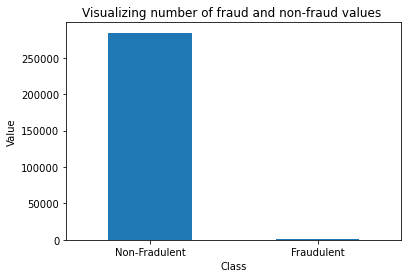

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

fraud_count = pd.value_counts(df['Class'])
fraud_count.plot(kind='bar',rot=0)
plt.title("Visualizing number of fraud and non-fraud values ")
plt.xticks(range(2), ['Non-Fradulent', 'Fraudulent'])
plt.xlabel("Class")
plt.ylabel("Value")
#plt.annotate()
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Time'>

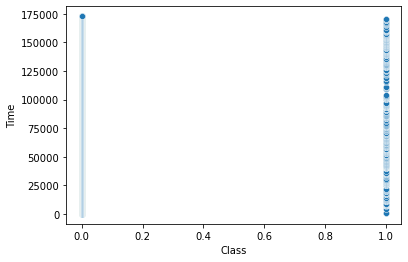

In [9]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x='Class',y='Time',data=df)
#

<AxesSubplot:xlabel='Class', ylabel='Amount'>

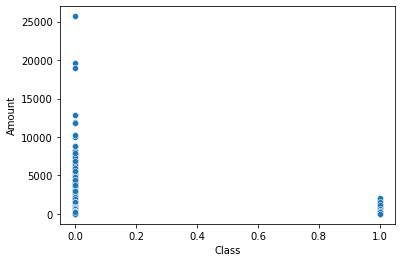

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x='Class',y='Amount',data=df)


In [11]:
# Drop unnecessary columns
df = df.drop('Time',axis=1)
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


### Splitting the data into train & test data

In [12]:
y= df['Class'] #class variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X=df.drop('Class',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=100,stratify=y) 

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
148
344


### Plotting the distribution of a variable

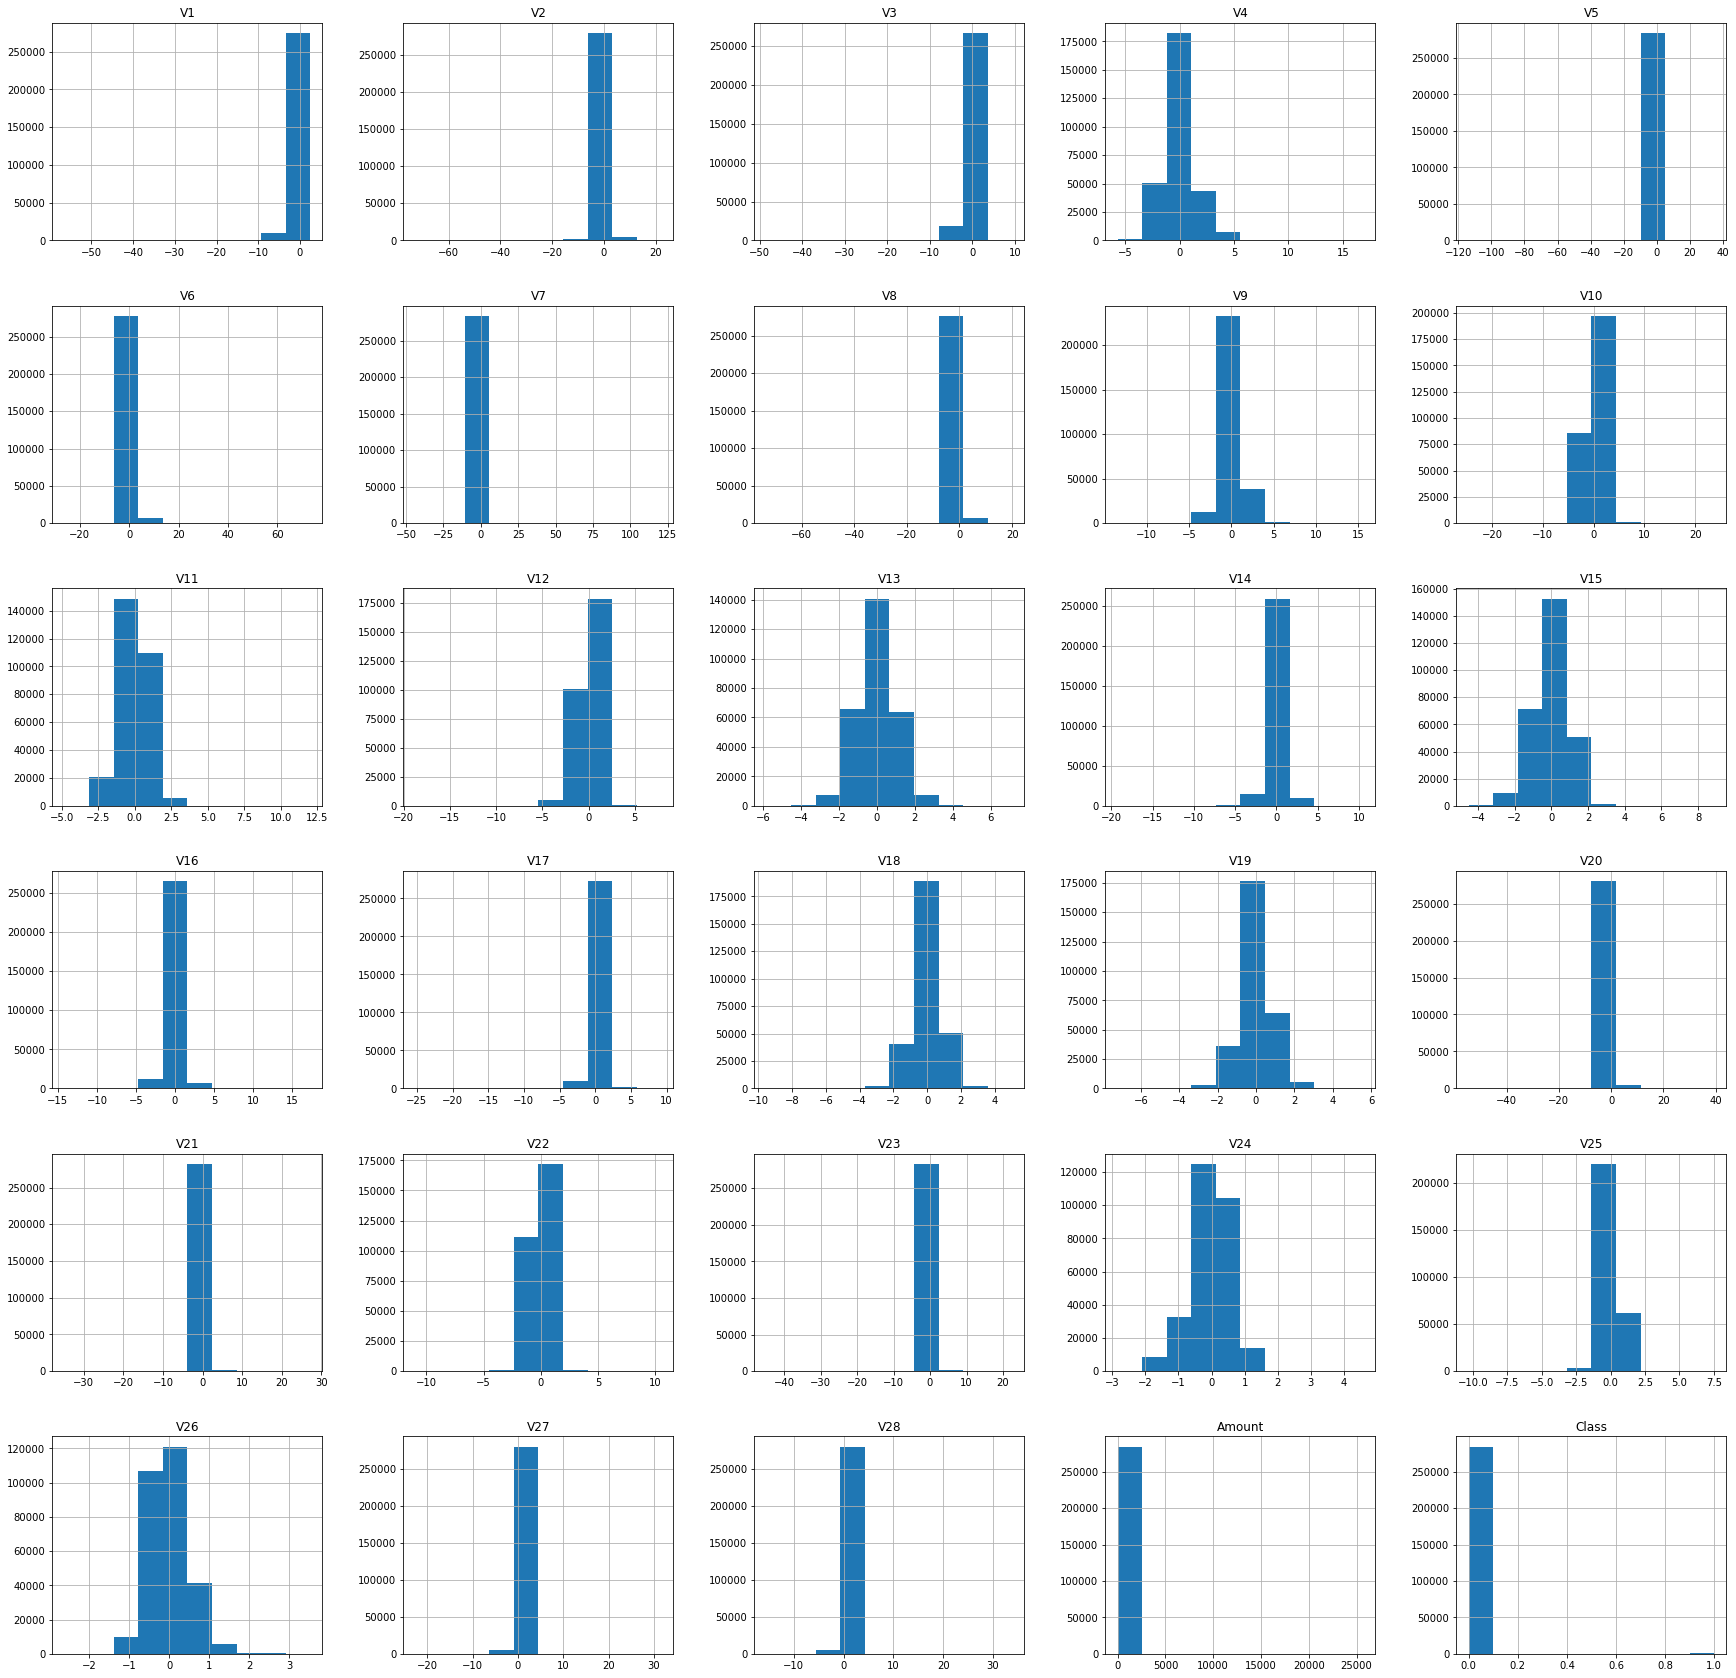

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
df.hist(figsize=(30,30))
plt.show()

#### Features 'Amount' and 'Class' seem to be heavily skewed to the left, along with a few other features.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer 

pt = PowerTransformer(copy=False)
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.fit_transform(X_test)

y_train_pt = pt.fit_transform(y_train.to_frame())
y_test_pt = pt.fit_transform(y_test.to_frame())

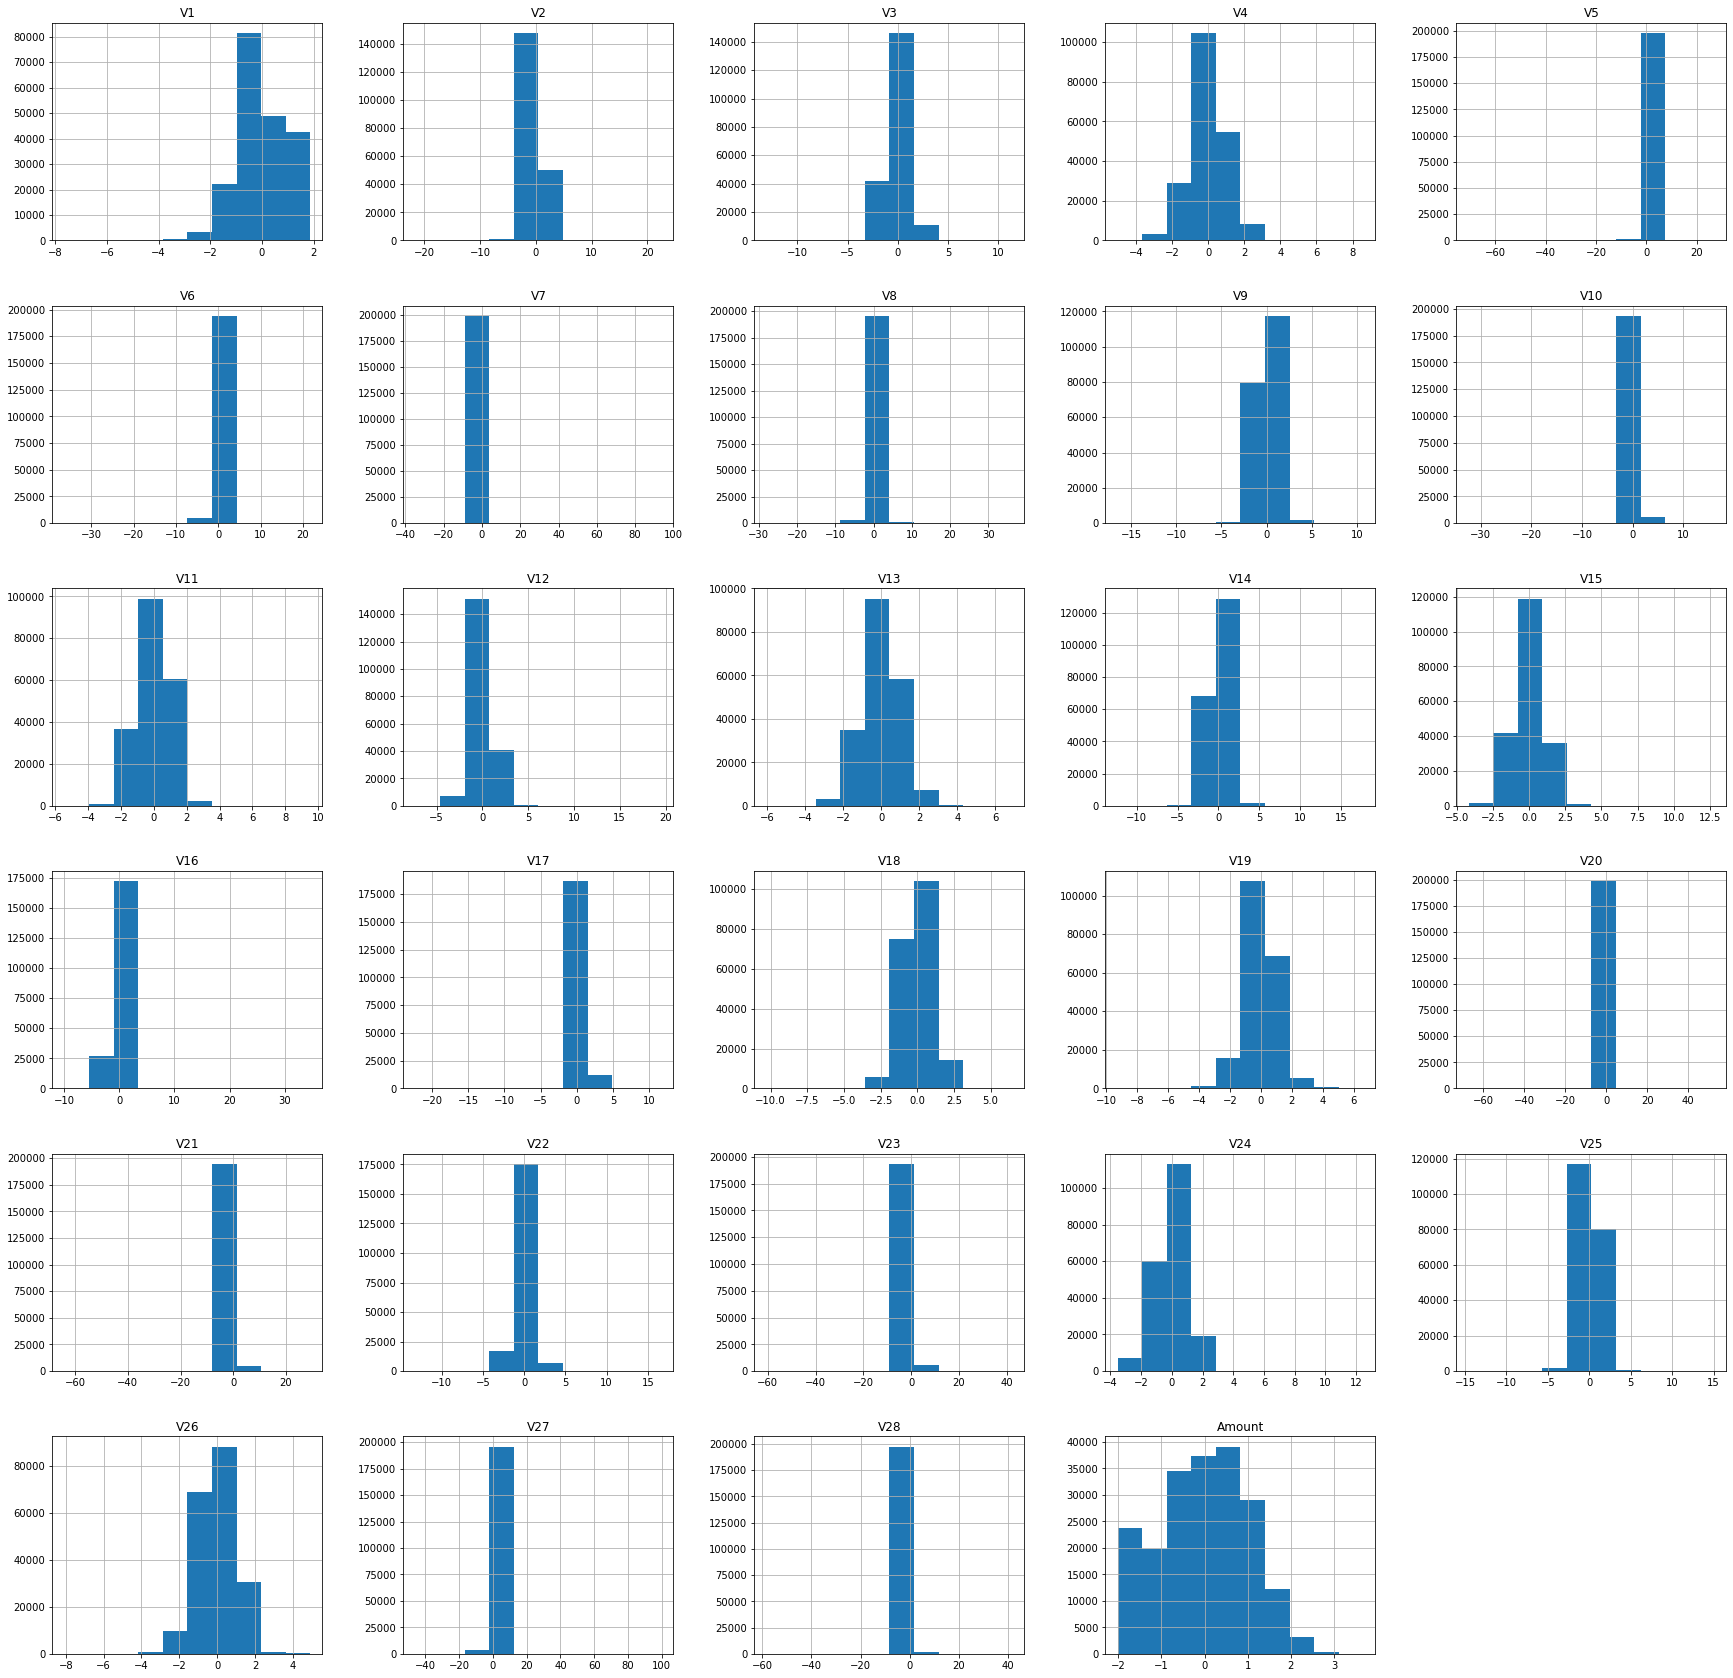

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
X_test.hist(figsize=(30,30))
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [18]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold()
skf.get_n_splits(X,y)

StratifiedKFold(random_state=None, shuffle=False)
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


In [19]:
print(X_train_cv.shape)
print(X_test_cv.shape)
print(y_train_cv.shape)
print(y_test_cv.shape)

(227846, 29)
(56961, 29)
(227846,)
(56961,)


In [20]:
#perform hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train_cv, y_train_cv)
search.best_params_




C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\lin

{'C': 2.4942547871438894, 'penalty': 'l2'}

In [21]:
#print the optimum value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)


Accuracy 0.99903443553972
Optimal Parameters {'C': 2.4942547871438894, 'penalty': 'l2'}


C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics
Accuracy  0.9990519829356929
F1 Score  0.6301369863013699
Precision Score  0.9583333333333334
Recall Score  0.46938775510204084
AUC Score - Chosen metric  0.7346762914229582


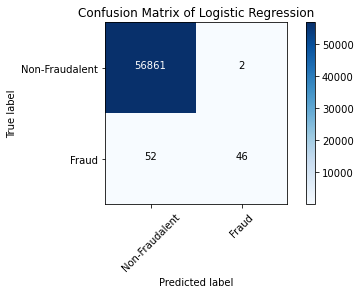

In [22]:
#Logistic Regression with optimal hyperparameters
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
import itertools # advanced tools
from sklearn.metrics import classification_report # Classificatio Report
from sklearn.metrics import recall_score # Recall 
from sklearn.metrics import precision_score # Prescison 
from sklearn.metrics import roc_auc_score # Area Under Curve


opti_logistic = LogisticRegression(C=2.5, penalty='l2', max_iter=200, random_state=0)
opti_logistic.fit(X_train_cv, y_train_cv)
opti_ypred = opti_logistic.predict(X_test_cv)

#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti_ypred)))
print("AUC Score - Chosen metric ", (roc_auc_score(y_test_cv, opti_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Logistic Regression'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti_ypred, labels = [0, 1]) # Logistic Regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()




### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm

#perform hyperparameter tuning

knn = KNeighborsClassifier()
distributions = dict(n_neighbors=[1,2,3,4,5])
clf = RandomizedSearchCV(knn, distributions)
search = clf.fit(X_train_cv, y_train_cv)
search.best_params_


C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 3}

In [24]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9990739371368008
Optimal Parameters {'n_neighbors': 3}


In [25]:
#KNN with optimal hyperparameters
opti_knn = KNeighborsClassifier(n_neighbors=3)

opti_knn.fit(X_train_cv, y_train_cv)
opti__knn_ypred = opti_knn.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9991046505503766
F1 Score  0.6709677419354839
Precision Score  0.9122807017543859
Recall Score  0.5306122448979592
AUC Score   0.7652621571288242


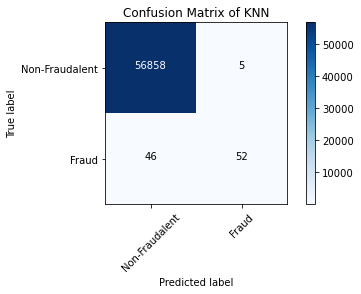

In [26]:


#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__knn_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__knn_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__knn_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__knn_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__knn_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of KNN'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__knn_ypred, labels = [0, 1]) # Logistic Regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [27]:
#SVM
from sklearn.svm import SVC # SVM algorithm

#perform hyperparameter tuning

svm = SVC()
distributions = dict(C=[1,2], gamma=['scale', 'auto'] )
clf = RandomizedSearchCV(estimator=svm, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_cv, y_train_cv)
search.best_params_


C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 17.3min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 27.6min finished


{'gamma': 'scale', 'C': 1}

In [28]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9727528376878237
Optimal Parameters {'gamma': 'scale', 'C': 1}


In [29]:
#KNN with optimal hyperparameters
opti_svm = SVC(C=1,gamma='scale')

opti_svm.fit(X_train_cv, y_train_cv)
opti__svm_ypred = opti_svm.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9983848598163656
F1 Score  0.11538461538461538
Precision Score  1.0
Recall Score  0.061224489795918366
AUC Score   0.5306122448979592


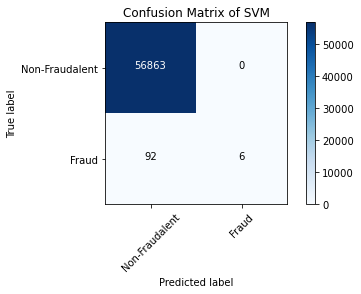

In [30]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__svm_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__svm_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__svm_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__svm_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__svm_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of SVM'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__svm_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [31]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
distributions = dict(max_depth=range(1,10), criterion=['entropy', 'gini'] )
clf = RandomizedSearchCV(estimator=dt, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_cv, y_train_cv)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.1s finished


{'max_depth': 3, 'criterion': 'entropy'}

In [32]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9372027622765602
Optimal Parameters {'max_depth': 3, 'criterion': 'entropy'}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [33]:
#Decision Tree with optimal hyperparameters
opti_dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')

opti_dt.fit(X_train_cv, y_train_cv)
opti__dt_ypred = opti_dt.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9993153210091115
F1 Score  0.7868852459016393
Precision Score  0.8470588235294118
Recall Score  0.7346938775510204
AUC Score   0.8672326289431059


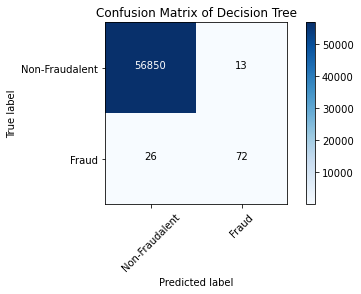

In [34]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__dt_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__dt_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__dt_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__dt_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__dt_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Decision Tree'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__dt_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [35]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
distributions = dict(n_estimators=range(1,100,10), max_depth=range(1,10), criterion=['entropy', 'gini'] )
clf = RandomizedSearchCV(estimator=rf, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_cv, y_train_cv)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min finished


{'n_estimators': 51, 'max_depth': 6, 'criterion': 'entropy'}

In [36]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.978281871299469
Optimal Parameters {'n_estimators': 51, 'max_depth': 6, 'criterion': 'entropy'}


In [37]:
#Random Forest with optimal hyperparameters
opti_rf = RandomForestClassifier(n_estimators=81,max_depth=7, criterion='entropy')

opti_rf.fit(X_train_cv, y_train_cv)
opti__rf_ypred = opti_rf.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.999420656238479
F1 Score  0.8
Precision Score  0.9850746268656716
Recall Score  0.673469387755102
AUC Score   0.8367259008135199


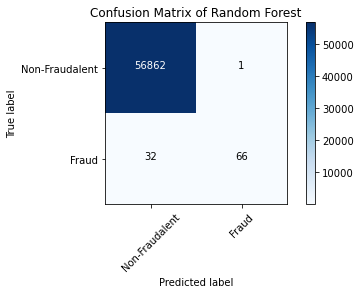

In [38]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__rf_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__rf_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__rf_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__rf_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__rf_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Random Forest'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__rf_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [47]:
#XGBoost
from xgboost import XGBClassifier

xgbc = XGBClassifier()
distributions = dict(n_estimators=range(1,100,10), max_depth=range(1,10))
clf = RandomizedSearchCV(estimator=xgbc, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_cv, y_train_cv)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.6min finished
C:\Users\ICER LAB\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 31, 'max_depth': 3}

In [48]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.975875255265343
Optimal Parameters {'n_estimators': 31, 'max_depth': 3}


In [49]:
#XGBoost with optimal hyperparameters
opti_xgb = RandomForestClassifier(n_estimators=31,max_depth=7)

opti_xgb.fit(X_train_cv, y_train_cv)
opti__xgb_ypred = opti_xgb.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.999420656238479
F1 Score  0.7975460122699386
Precision Score  1.0
Recall Score  0.6632653061224489
AUC Score   0.8316326530612245


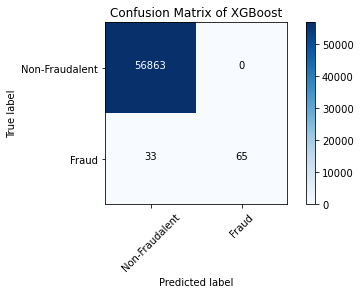

In [50]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__xgb_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__xgb_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__xgb_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__xgb_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__xgb_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of XGBoost'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__xgb_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 10
3rd Top var = 14


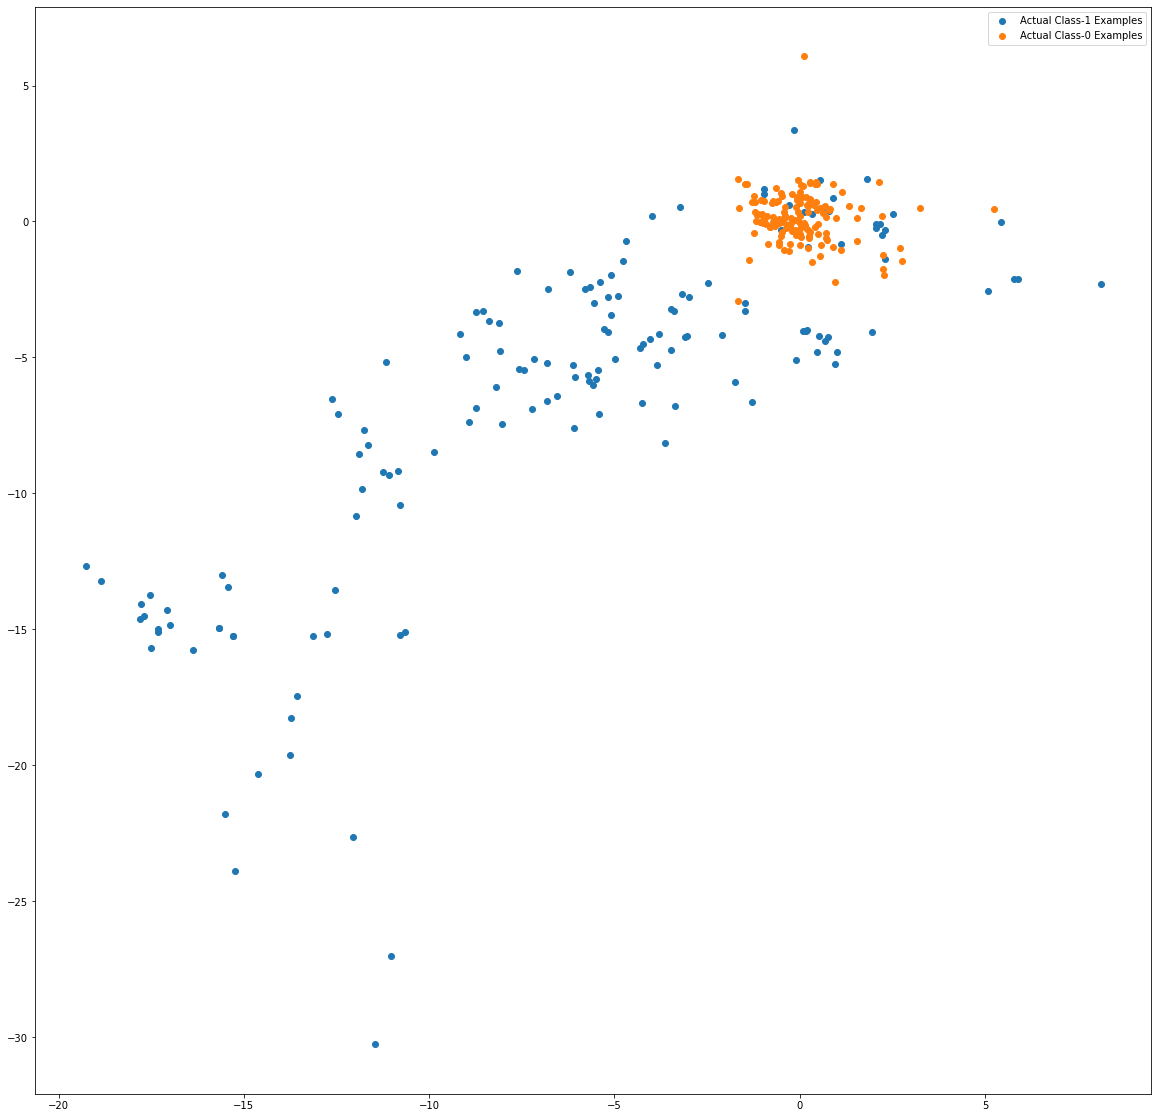

In [51]:
var_imp = []
for i in opti_xgb.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(opti_xgb.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(opti_xgb.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(opti_xgb.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(opti_xgb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(opti_xgb.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [53]:
#Summary of metrics
print("Summary of metrics of all models")
print("\nLogistic Regression-------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti_ypred)))
print("AUC Score - Chosen metric ", (roc_auc_score(y_test_cv, opti_ypred)))
print("\nKNN                -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__knn_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__knn_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__knn_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__knn_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__knn_ypred)))
print("\nSVM                -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__svm_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__svm_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__svm_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__svm_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__svm_ypred)))
print("\nDecision Tree      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__dt_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__dt_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__dt_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__dt_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__dt_ypred)))
print("\nRandom Forest      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__rf_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__rf_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__rf_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__rf_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__rf_ypred)))
print("\nXGBoost      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__xgb_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__xgb_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__xgb_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__xgb_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__xgb_ypred)))

Summary of metrics of all models

Logistic Regression-------------
Accuracy  0.9990519829356929
F1 Score  0.6301369863013699
Precision Score  0.9583333333333334
Recall Score  0.46938775510204084
AUC Score - Chosen metric  0.7346762914229582

KNN                -------------
Accuracy  0.9991046505503766
F1 Score  0.6709677419354839
Precision Score  0.9122807017543859
Recall Score  0.5306122448979592
AUC Score   0.7652621571288242

SVM                -------------
Accuracy  0.9983848598163656
F1 Score  0.11538461538461538
Precision Score  1.0
Recall Score  0.061224489795918366
AUC Score   0.5306122448979592

Decision Tree      -------------
Accuracy  0.9993153210091115
F1 Score  0.7868852459016393
Precision Score  0.8470588235294118
Recall Score  0.7346938775510204
AUC Score   0.8672326289431059

Random Forest      -------------
Accuracy  0.999420656238479
F1 Score  0.8
Precision Score  0.9850746268656716
Recall Score  0.673469387755102
AUC Score   0.8367259008135199

XGBoost      ------

### Decision Tree model seems to be the best at catching fraud with the highest correct fraud calls with highest ROC_AUC Score

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [56]:
print("Shapes before Oversampling")
print("Shape of X_train_cv", X_train_cv.shape)
print("Shape of y_train_cv",y_train_cv.shape)

Shapes before Oversampling
Shape of X_train_cv (227846, 29)
Shape of y_train_cv (227846,)


In [58]:
from imblearn.over_sampling import RandomOverSampler

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
rand_Os = RandomOverSampler()
X_train_ro, y_train_ro = rand_Os.fit_resample(X_train_cv,y_train_cv)

print("Shapes after oversampling")
print("Shape of X_train_ro", X_train_ro.shape)
print("Shape of y_train_ro",y_train_ro.shape)


Shapes after oversampling
Shape of X_train_ro (454904, 29)
Shape of y_train_ro (454904,)


In [59]:
#Logistic Regression

#perform hyperparameter tuning
logistic = LogisticRegression(max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train_ro, y_train_ro)
search.best_params_



C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\lin

{'C': 0.22685190926977272, 'penalty': 'l2'}

In [60]:
#print the optimum value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9461226866910332
Optimal Parameters {'C': 0.22685190926977272, 'penalty': 'l2'}


C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics
Accuracy  0.9771773669703833
F1 Score  0.1180461329715061
Precision Score  0.06322674418604651
Recall Score  0.8877551020408163
AUC Score - Chosen metric  0.9325432914843302


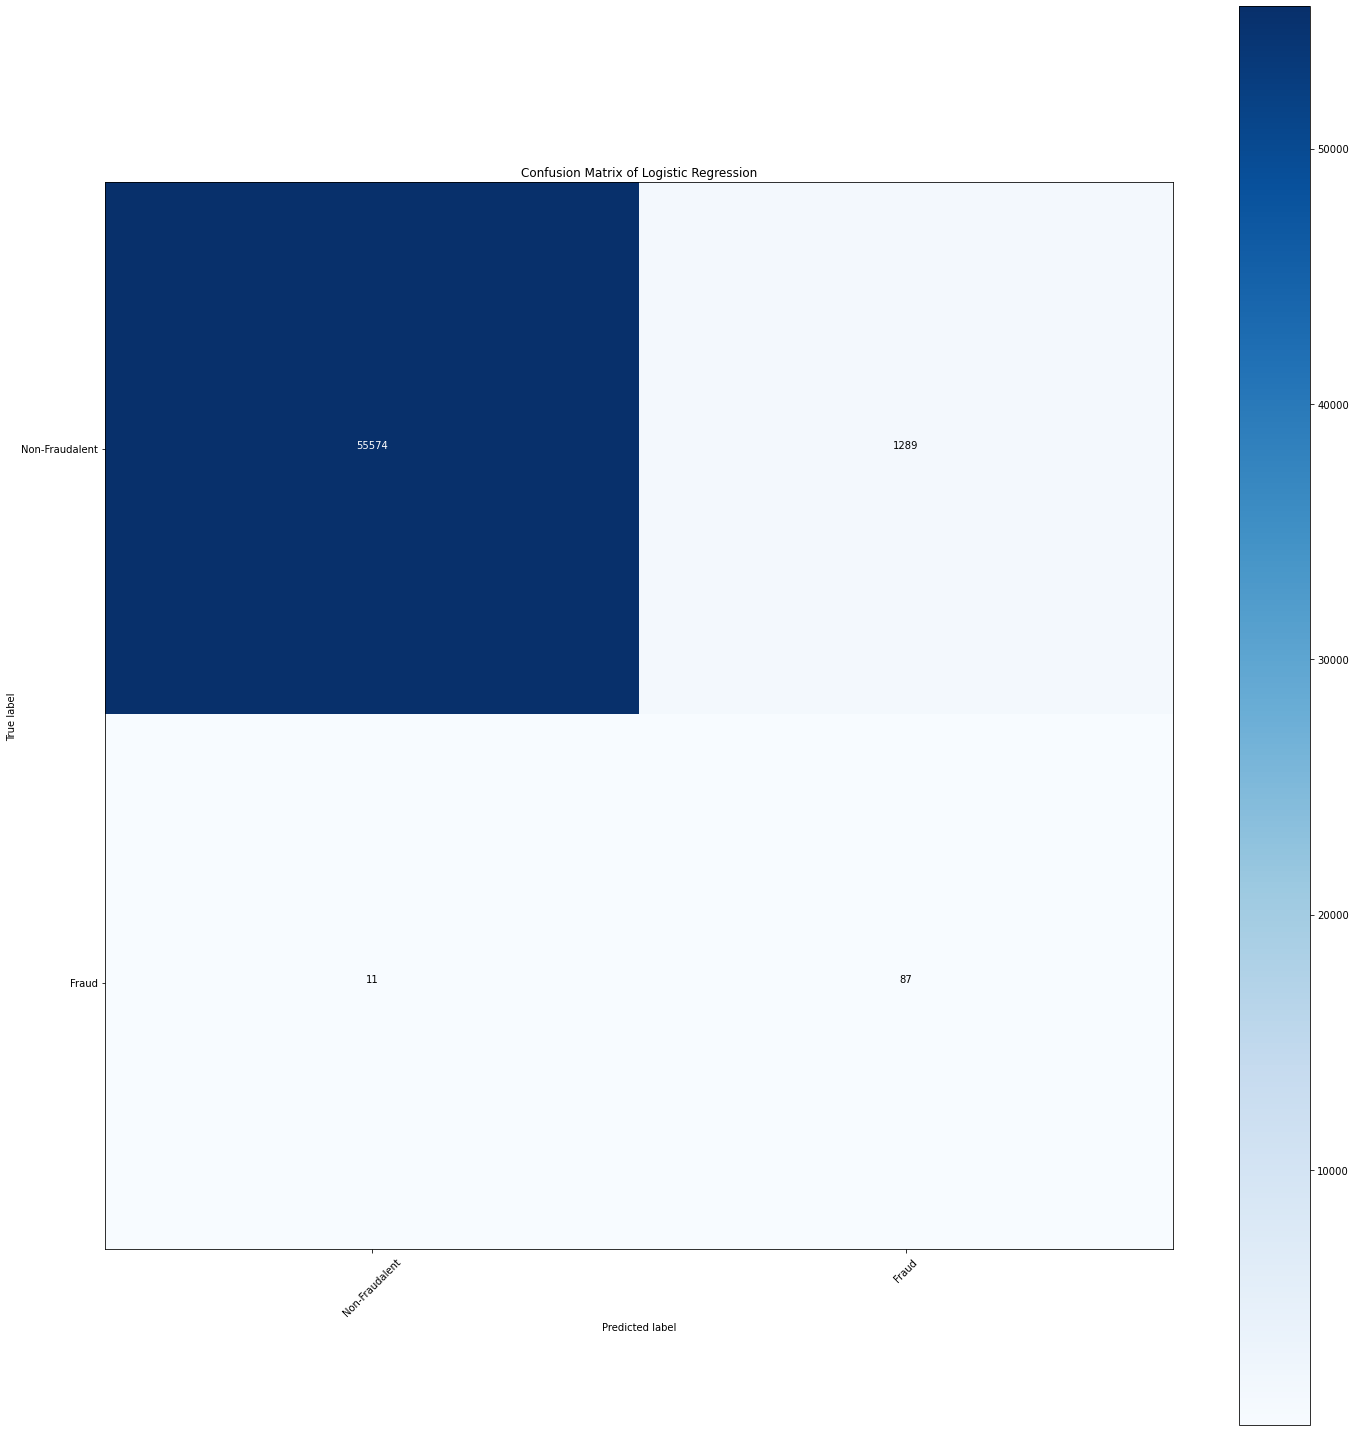

In [61]:
#Logistic Regression with optimal hyperparameters
opti_logistic = LogisticRegression(C=0.2, penalty='l2', max_iter=200, random_state=0)
opti_logistic.fit(X_train_ro, y_train_ro)
opti_ypred = opti_logistic.predict(X_test_cv)

#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti_ypred)))
print("AUC Score - Chosen metric ", (roc_auc_score(y_test_cv, opti_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Logistic Regression'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti_ypred, labels = [0, 1]) # Logistic Regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [63]:
#KNN
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm

#perform hyperparameter tuning

knn = KNeighborsClassifier()
distributions = dict(n_neighbors=[1,2,3,4,5])
clf = RandomizedSearchCV(knn, distributions)
search = clf.fit(X_train_ro, y_train_ro)
search.best_params_


C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 1}

In [64]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.999617501999752
Optimal Parameters {'n_neighbors': 1}


In [67]:
#KNN with optimal hyperparameters
opti_knn = KNeighborsClassifier(n_neighbors=1)

opti_knn.fit(X_train_ro, y_train_ro)
opti__knn_ypred = opti_knn.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9990870946788153
F1 Score  0.6666666666666666
Precision Score  0.896551724137931
Recall Score  0.5306122448979592
AUC Score   0.765253364064793


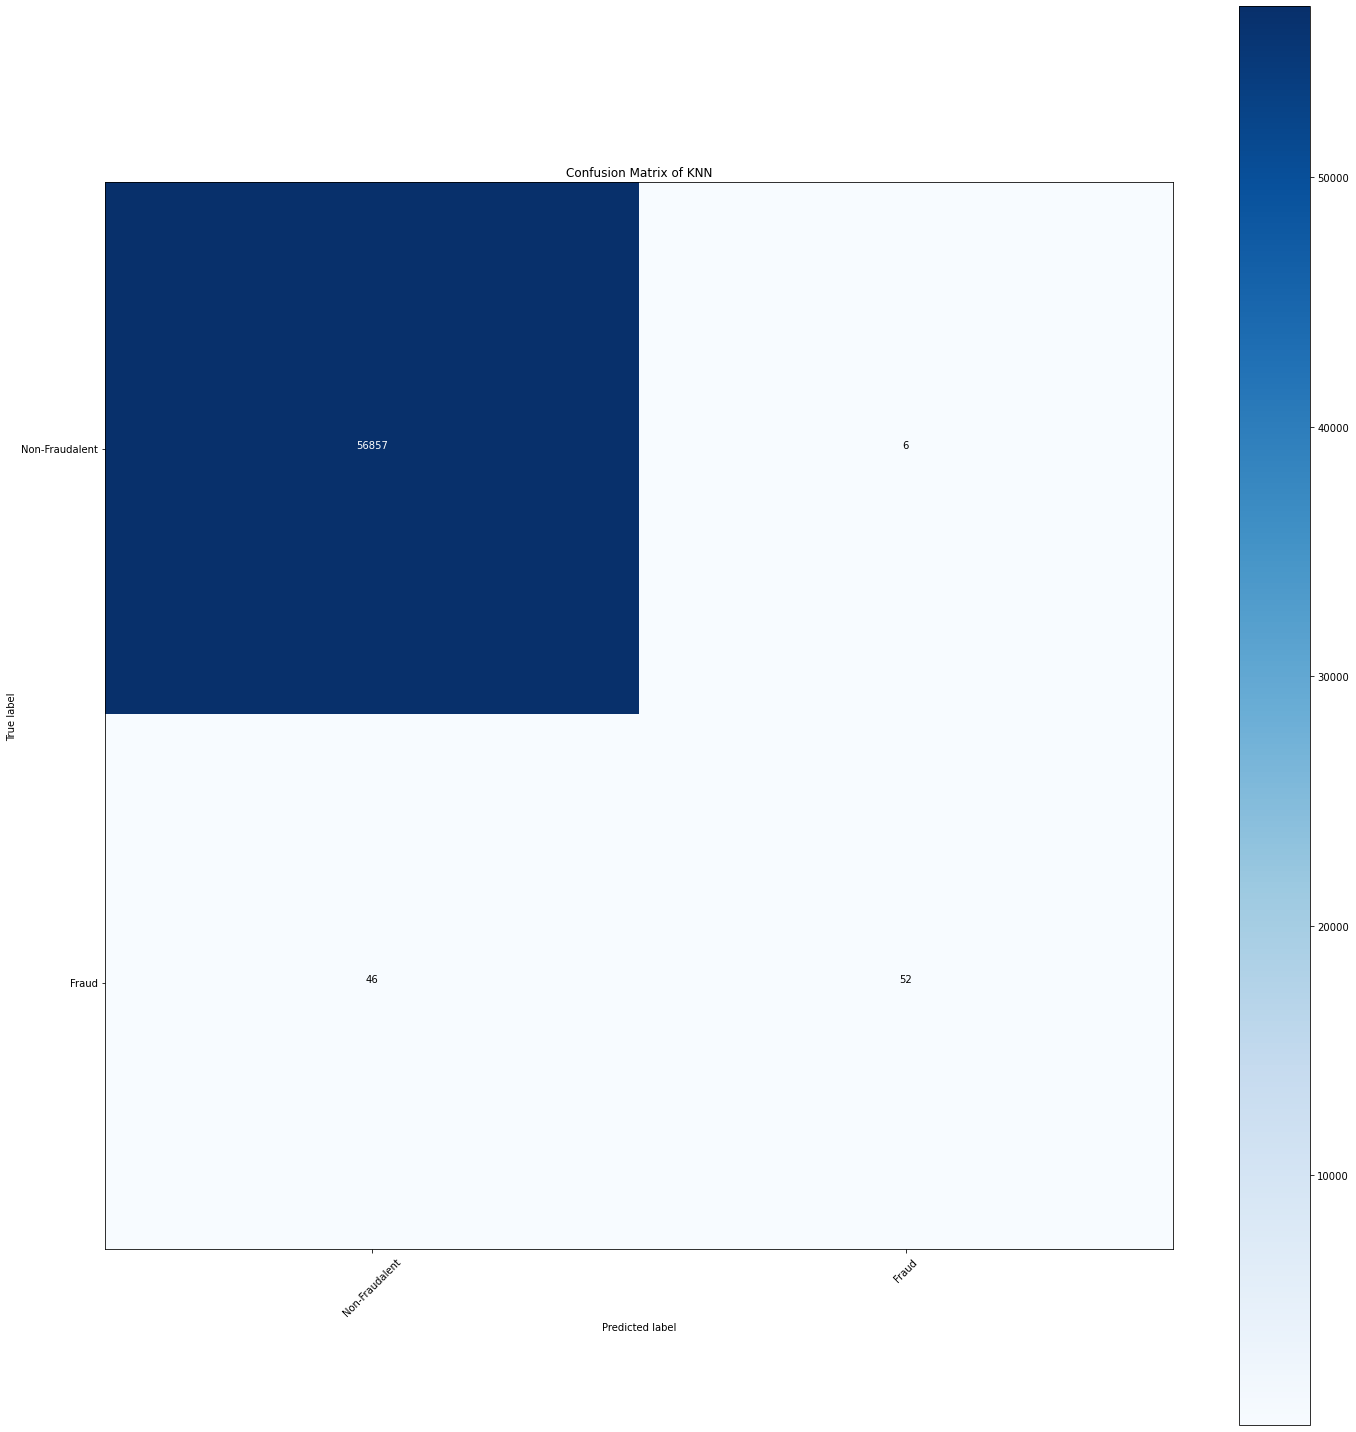

In [68]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__knn_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__knn_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__knn_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__knn_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__knn_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of KNN'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__knn_ypred, labels = [0, 1]) # Logistic Regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [69]:
#SVM
from sklearn.svm import SVC # SVM algorithm

#perform hyperparameter tuning

svm = SVC()
distributions = dict(C=[1,2], gamma=['scale', 'auto'] )
clf = RandomizedSearchCV(estimator=svm, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_ro, y_train_ro)
search.best_params_

C:\Users\ICER LAB\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 70.6min remaining: 35.3min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 91.5min finished


{'gamma': 'auto', 'C': 2}

In [70]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9999131327671099
Optimal Parameters {'gamma': 'auto', 'C': 2}


In [71]:
#SVM with optimal hyperparameters
opti_svm = SVC(C=2,gamma='auto')

opti_svm.fit(X_train_ro, y_train_ro)
opti__svm_ypred = opti_svm.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9985779744035392
F1 Score  0.3999999999999999
Precision Score  0.7297297297297297
Recall Score  0.2755102040816326
AUC Score   0.6376671714005054


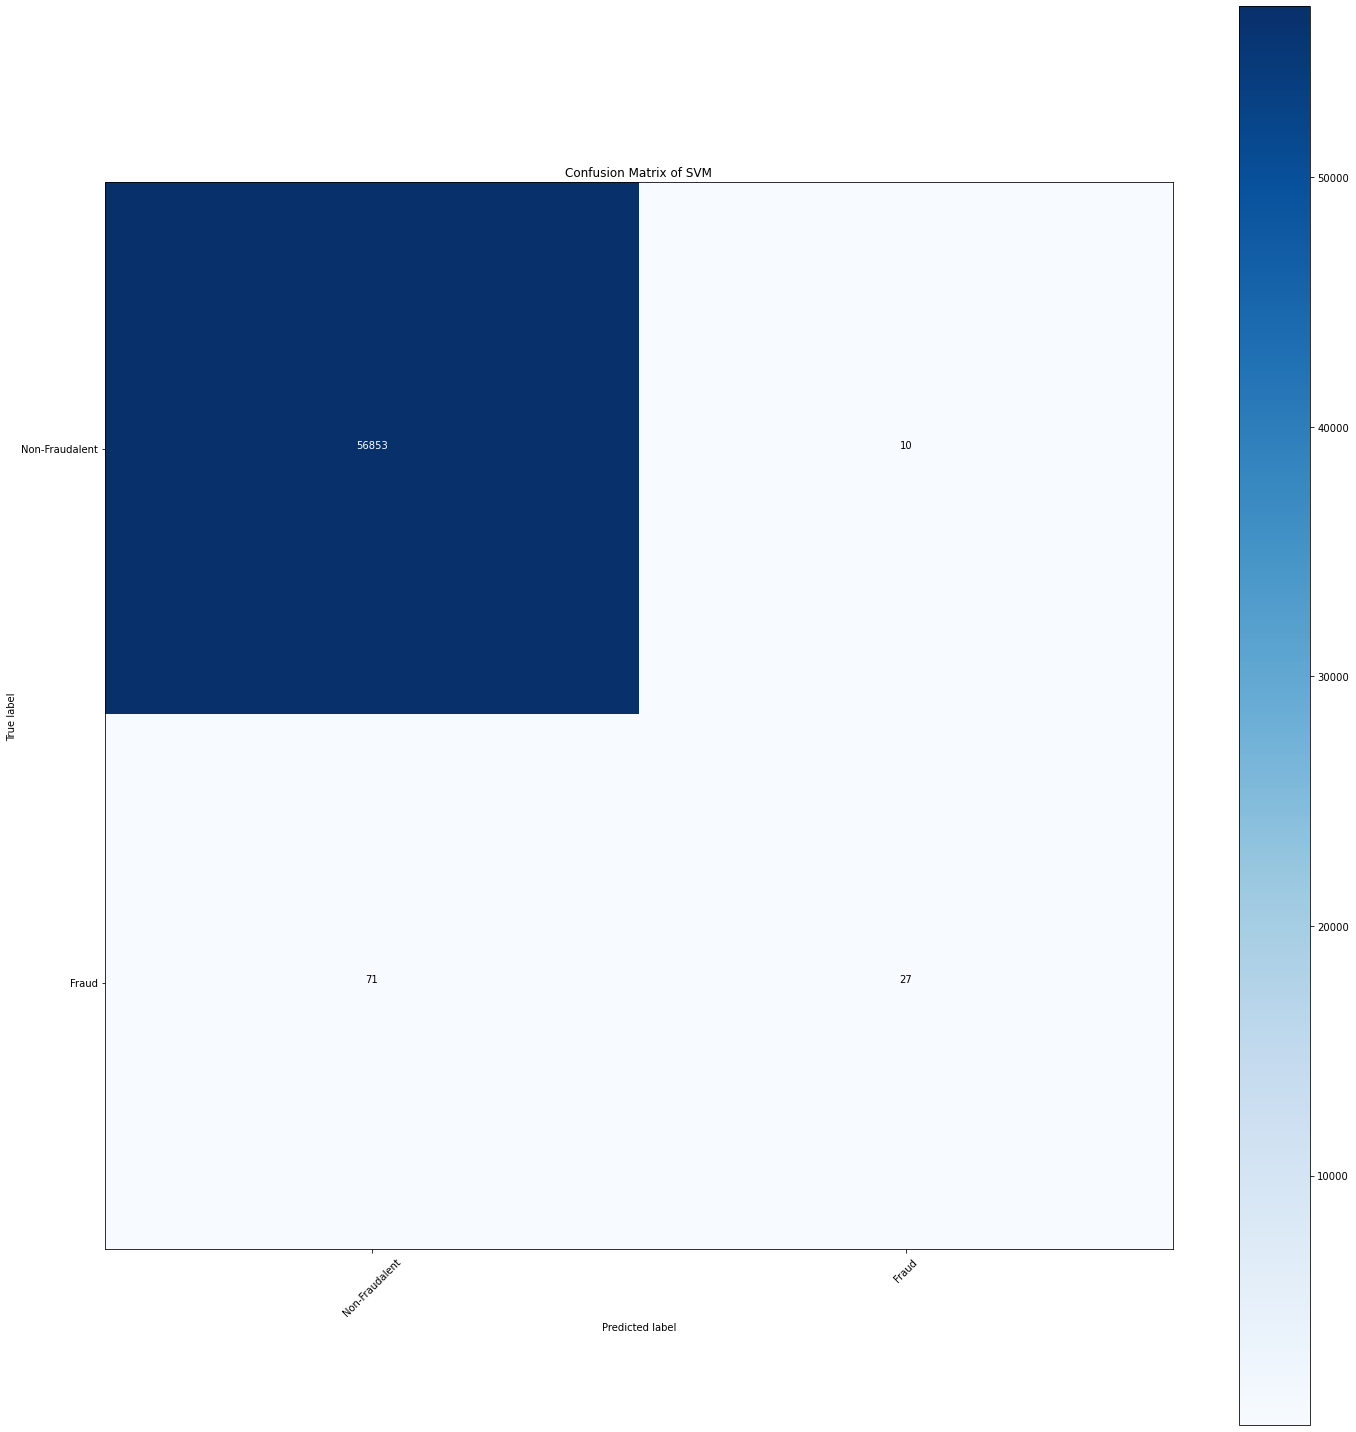

In [72]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__svm_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__svm_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__svm_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__svm_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__svm_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of SVM'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__svm_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [73]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
distributions = dict(max_depth=range(1,10), criterion=['entropy', 'gini'] )
clf = RandomizedSearchCV(estimator=dt, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_ro, y_train_ro)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.4s finished


{'max_depth': 9, 'criterion': 'entropy'}

In [74]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.998727096169581
Optimal Parameters {'max_depth': 9, 'criterion': 'entropy'}


In [75]:
#Decision Tree with optimal hyperparameters
opti_dt = DecisionTreeClassifier(max_depth=9, criterion='entropy')

opti_dt.fit(X_train_ro, y_train_ro)
opti__dt_ypred = opti_dt.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.993873000825126
F1 Score  0.2892057026476579
Precision Score  0.1806615776081425
Recall Score  0.7244897959183674
AUC Score   0.859413531341172


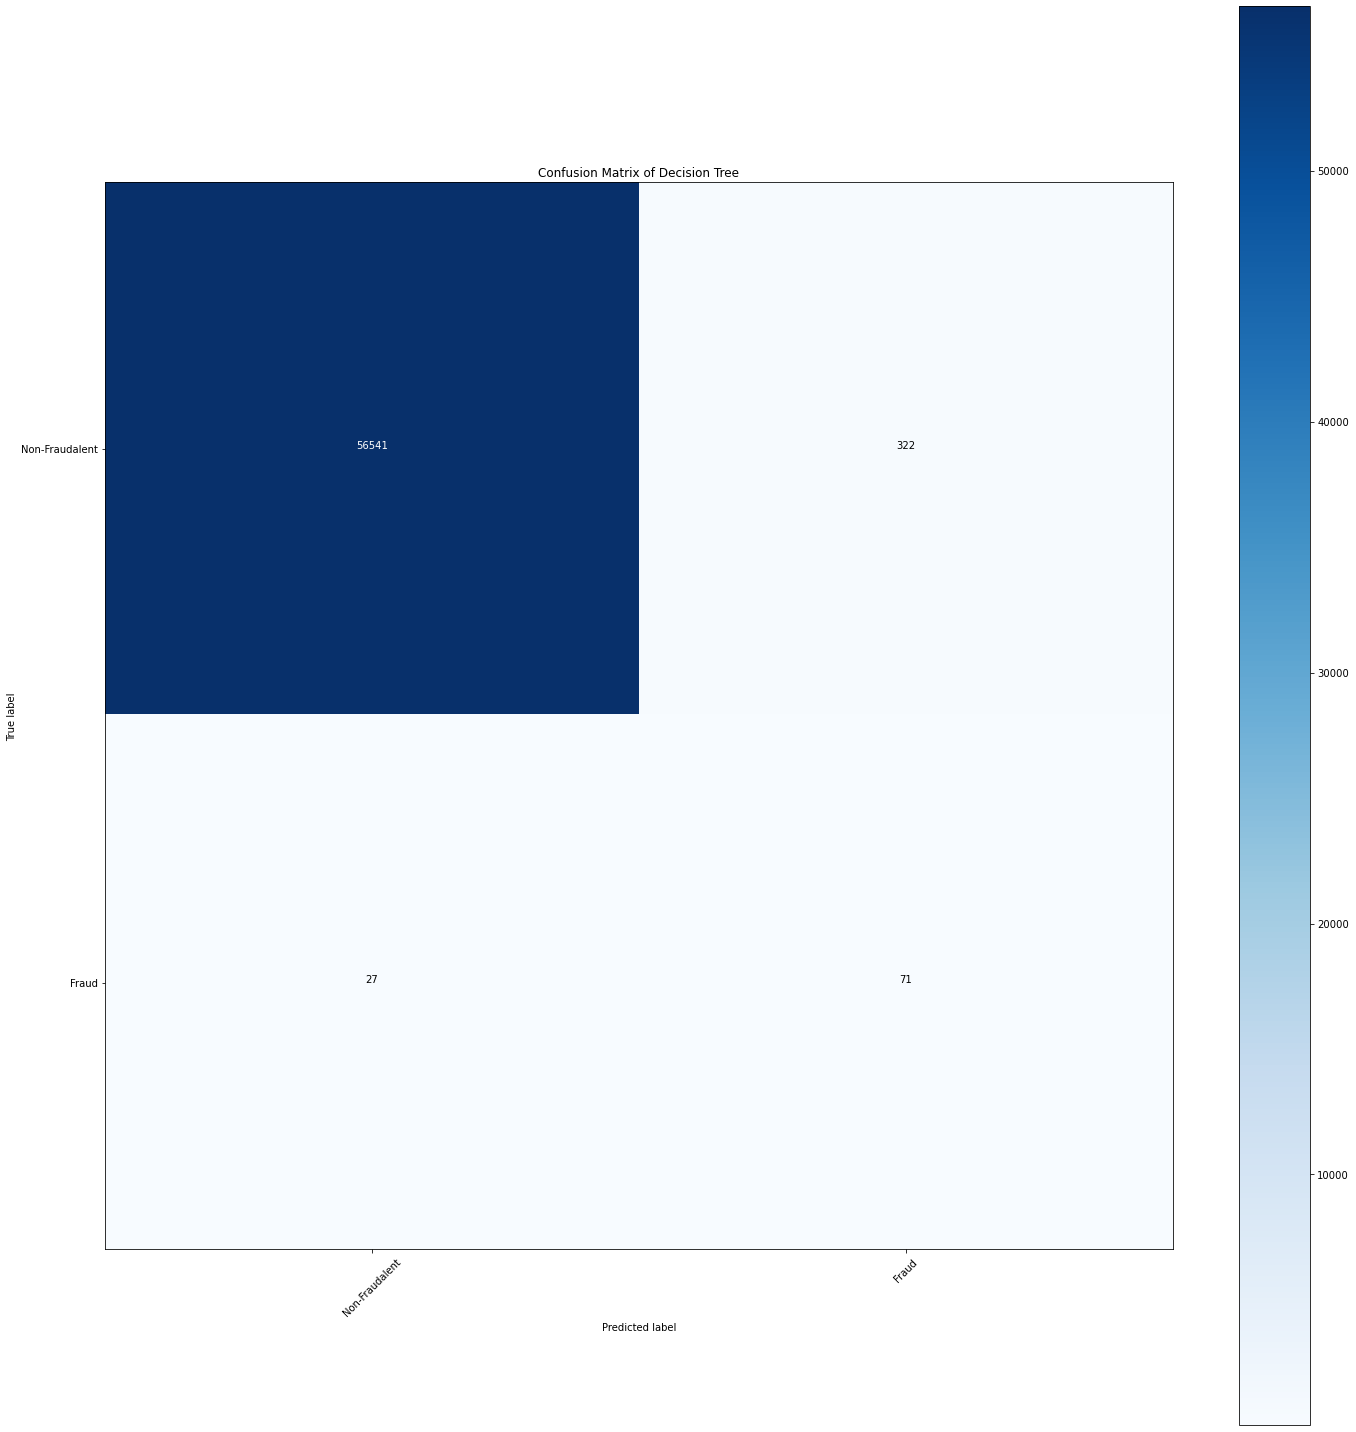

In [76]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__dt_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__dt_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__dt_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__dt_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__dt_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Decision Tree'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__dt_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [77]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
distributions = dict(n_estimators=range(1,100,10), max_depth=range(1,10), criterion=['entropy', 'gini'] )
clf = RandomizedSearchCV(estimator=rf, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_ro, y_train_ro)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.3min finished


{'n_estimators': 51, 'max_depth': 8, 'criterion': 'gini'}

In [78]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9996072889521425
Optimal Parameters {'n_estimators': 51, 'max_depth': 8, 'criterion': 'gini'}


In [80]:
#Random Forest with optimal hyperparameters
opti_rf = RandomForestClassifier(n_estimators=51,max_depth=8, criterion='gini')

opti_rf.fit(X_train_ro, y_train_ro)
opti__rf_ypred = opti_rf.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9990519829356929
F1 Score  0.7378640776699029
Precision Score  0.7037037037037037
Recall Score  0.7755102040816326
AUC Score   0.8874737239918212


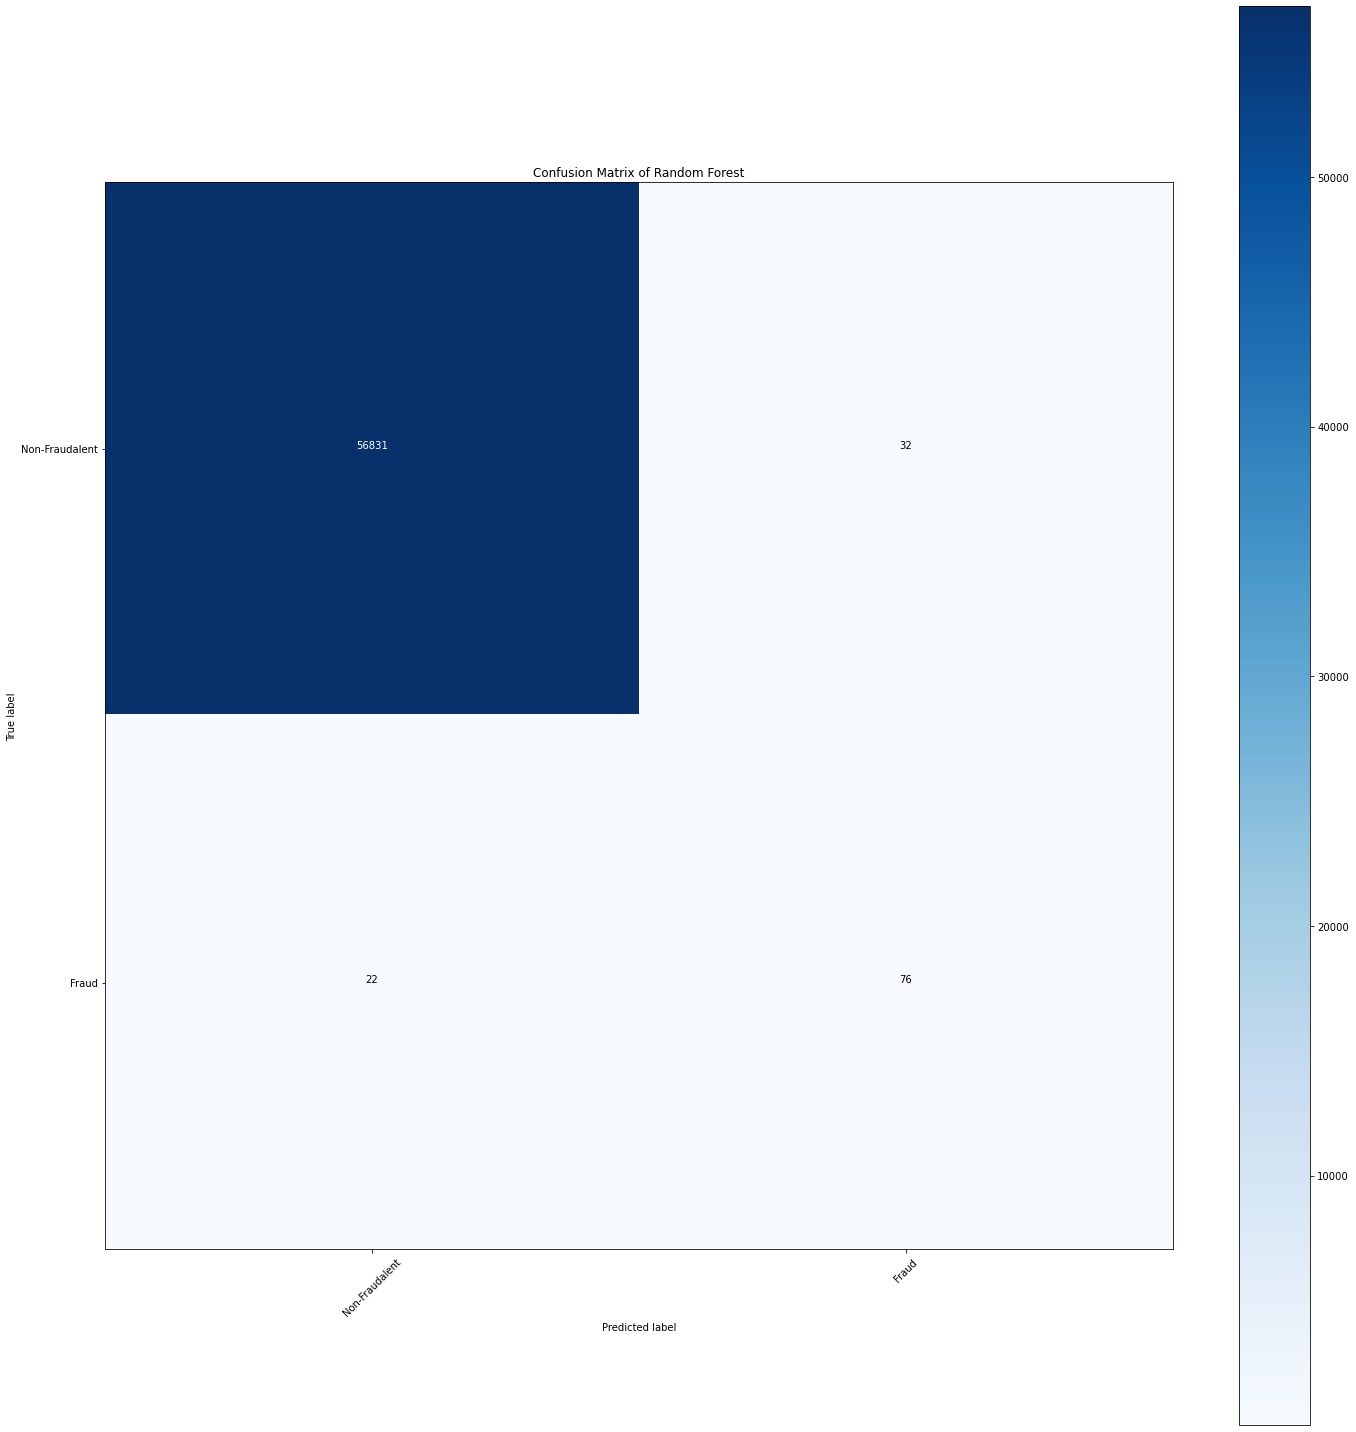

In [81]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__rf_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__rf_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__rf_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__rf_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__rf_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Random Forest'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__rf_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [82]:
#XGBoost
from xgboost import XGBClassifier

xgbc = XGBClassifier()
distributions = dict(n_estimators=range(1,100,10), max_depth=range(1,10))
clf = RandomizedSearchCV(estimator=xgbc, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_ro, y_train_ro)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.4min finished
C:\Users\ICER LAB\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 61, 'max_depth': 9}

In [83]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9998853059685988
Optimal Parameters {'n_estimators': 61, 'max_depth': 9}


In [84]:
#XGBoost with optimal hyperparameters
opti_xgb = RandomForestClassifier(n_estimators=61,max_depth=9)

opti_xgb.fit(X_train_ro, y_train_ro)
opti__xgb_ypred = opti_xgb.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9993328768806727
F1 Score  0.7934782608695652
Precision Score  0.8488372093023255
Recall Score  0.7448979591836735
AUC Score   0.8723346697594326


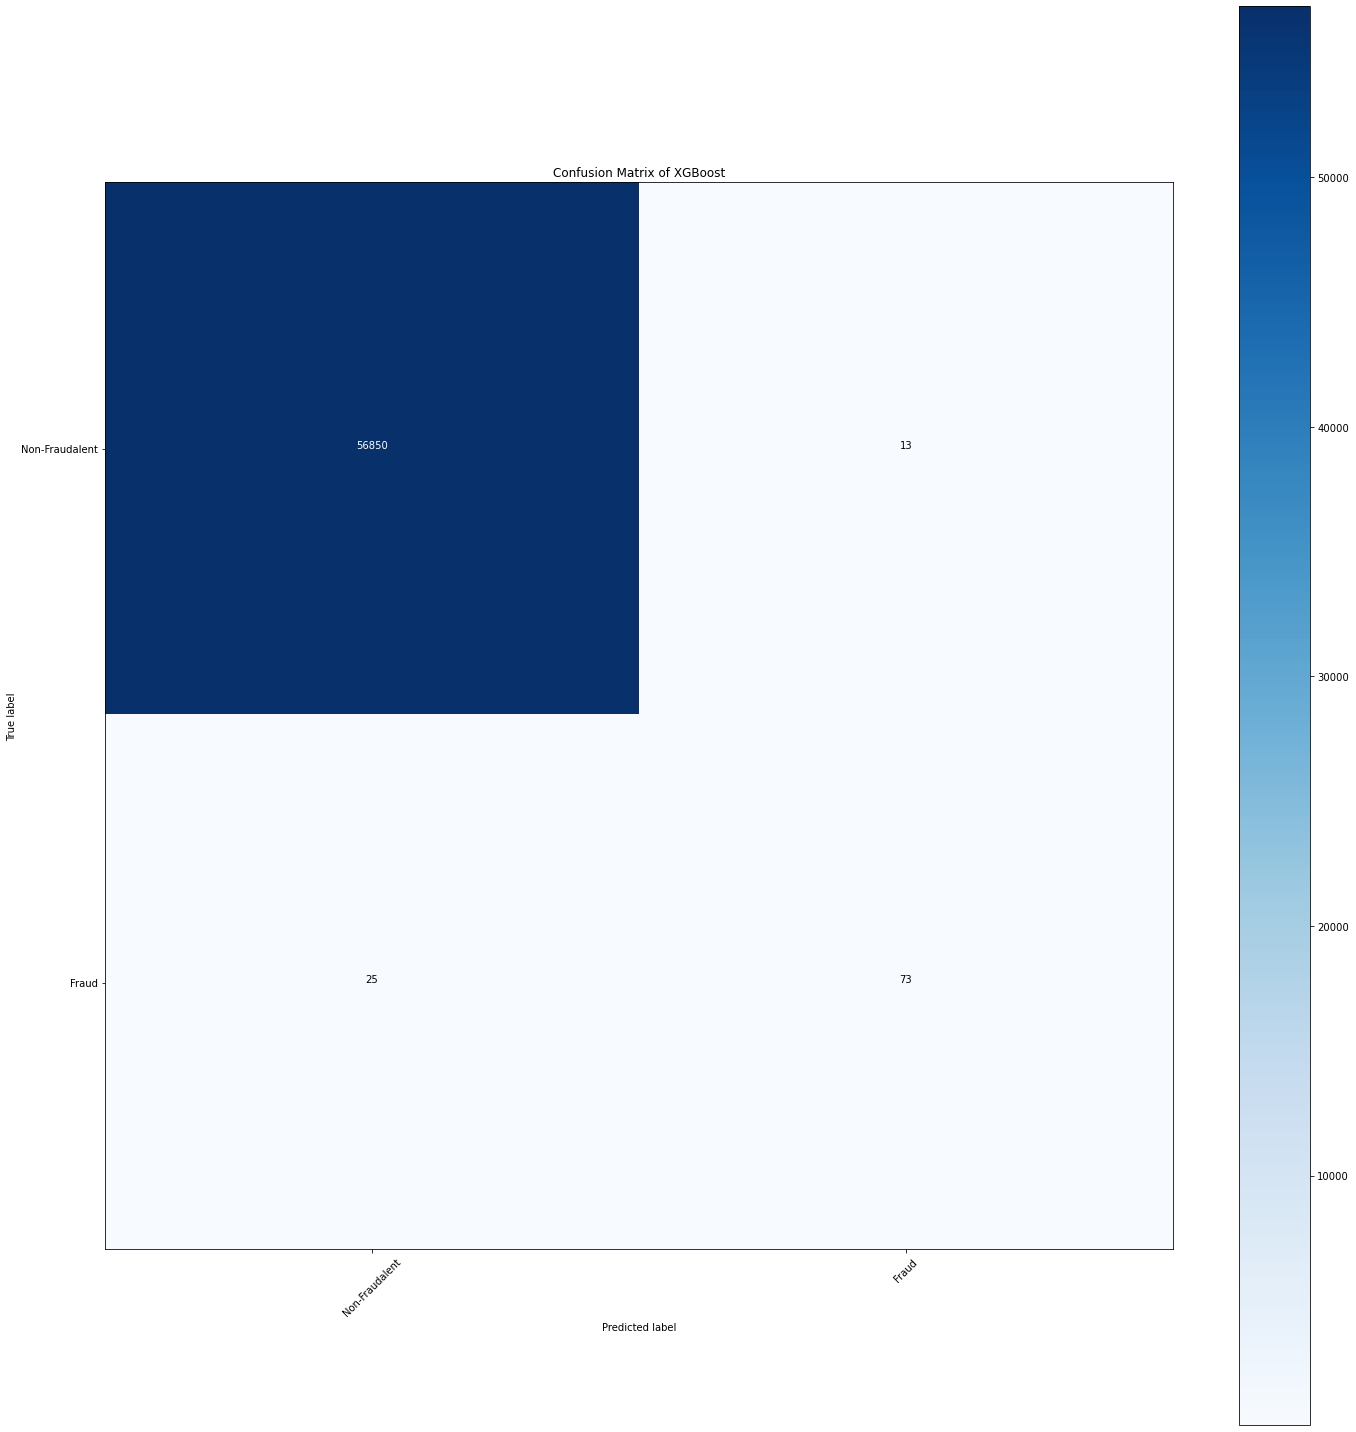

In [85]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__xgb_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__xgb_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__xgb_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__xgb_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__xgb_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of XGBoost'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__xgb_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [86]:
#Summary of metrics
print("Summary of metrics of all models after solving imbalance with random oversampling")
print("\nLogistic Regression-------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti_ypred)))
print("AUC Score - Chosen metric ", (roc_auc_score(y_test_cv, opti_ypred)))
print("\nKNN                -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__knn_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__knn_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__knn_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__knn_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__knn_ypred)))
print("\nSVM                -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__svm_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__svm_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__svm_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__svm_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__svm_ypred)))
print("\nDecision Tree      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__dt_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__dt_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__dt_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__dt_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__dt_ypred)))
print("\nRandom Forest      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__rf_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__rf_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__rf_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__rf_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__rf_ypred)))
print("\nXGBoost      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__xgb_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__xgb_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__xgb_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__xgb_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__xgb_ypred)))

Summary of metrics of all models after solving imbalance with random oversampling

Logistic Regression-------------
Accuracy  0.9771773669703833
F1 Score  0.1180461329715061
Precision Score  0.06322674418604651
Recall Score  0.8877551020408163
AUC Score - Chosen metric  0.9325432914843302

KNN                -------------
Accuracy  0.9990870946788153
F1 Score  0.6666666666666666
Precision Score  0.896551724137931
Recall Score  0.5306122448979592
AUC Score   0.765253364064793

SVM                -------------
Accuracy  0.9985779744035392
F1 Score  0.3999999999999999
Precision Score  0.7297297297297297
Recall Score  0.2755102040816326
AUC Score   0.6376671714005054

Decision Tree      -------------
Accuracy  0.993873000825126
F1 Score  0.2892057026476579
Precision Score  0.1806615776081425
Recall Score  0.7244897959183674
AUC Score   0.859413531341172

Random Forest      -------------
Accuracy  0.9990519829356929
F1 Score  0.7378640776699029
Precision Score  0.7037037037037037
Recall Sco

### Logistic Regression model looks to be the best at catching fraud with the highest correct fraud calls with highest ROC_AUC Score. It can also be inferred from the summary of metrics that there has been an overall increase in majority of the models' performance after applying RandomOverSampling

### Print the class distribution after applying SMOTE 

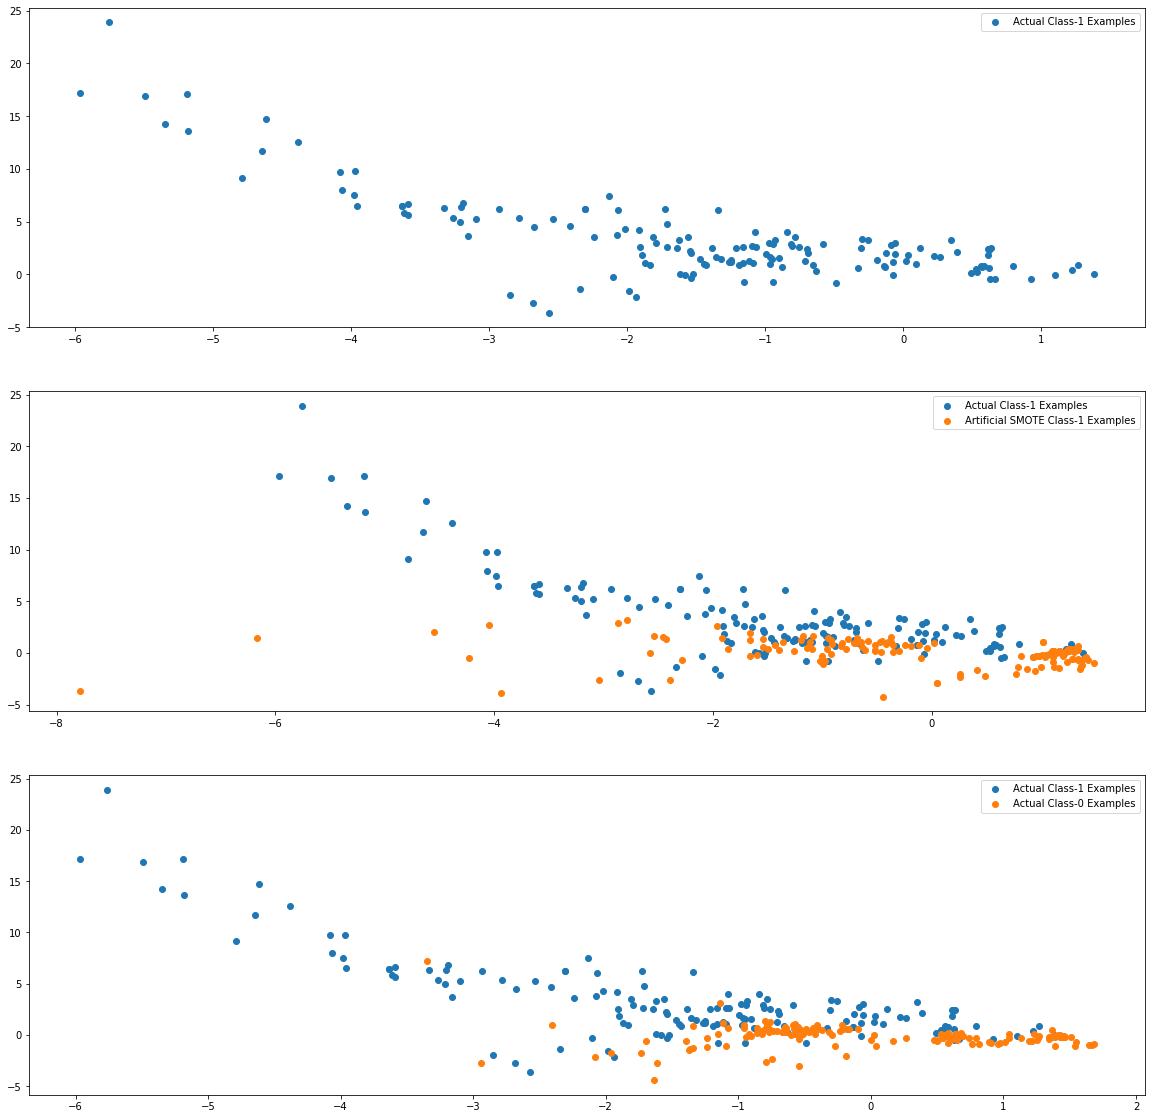

In [119]:
import warnings
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [89]:
print(X_train_smote.shape)

(454904, 29)


In [90]:
#Logistic Regression

#perform hyperparameter tuning
logistic = LogisticRegression(max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train_smote, y_train_smote)
search.best_params_



{'C': 1.5337660753031108, 'penalty': 'l2'}

In [91]:
#print the optimum value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9605784893175657
Optimal Parameters {'C': 1.5337660753031108, 'penalty': 'l2'}


Evaluation Metrics
Accuracy  0.9824616843103176
F1 Score  0.1454234388366125
Precision Score  0.07936507936507936
Recall Score  0.8673469387755102
AUC Score - Chosen metric  0.9250035082530982


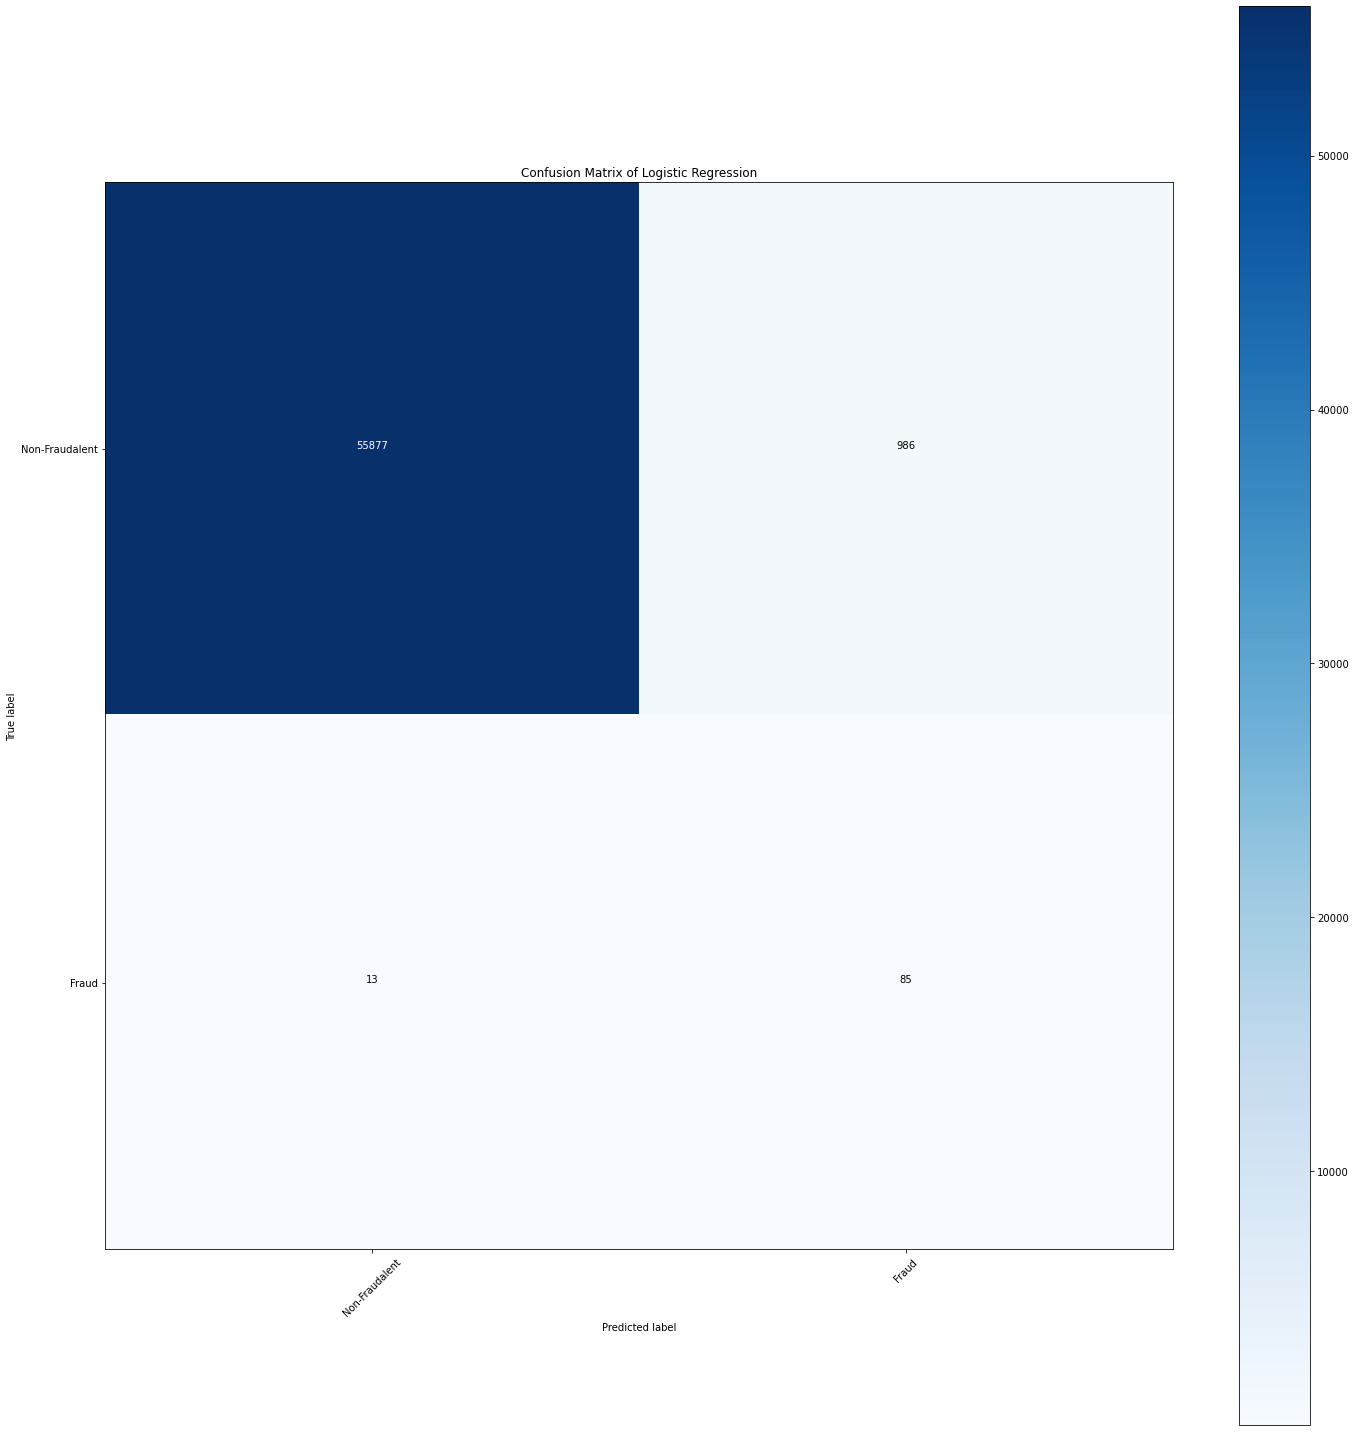

In [92]:
opti_logistic = LogisticRegression(C=1.5, penalty='l2', max_iter=200, random_state=0)
opti_logistic.fit(X_train_smote, y_train_smote)
opti_ypred = opti_logistic.predict(X_test_cv)

#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti_ypred)))
print("AUC Score - Chosen metric ", (roc_auc_score(y_test_cv, opti_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Logistic Regression'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti_ypred, labels = [0, 1]) # Logistic Regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()


In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

Text(0.5, 1.0, 'ROC Curve')

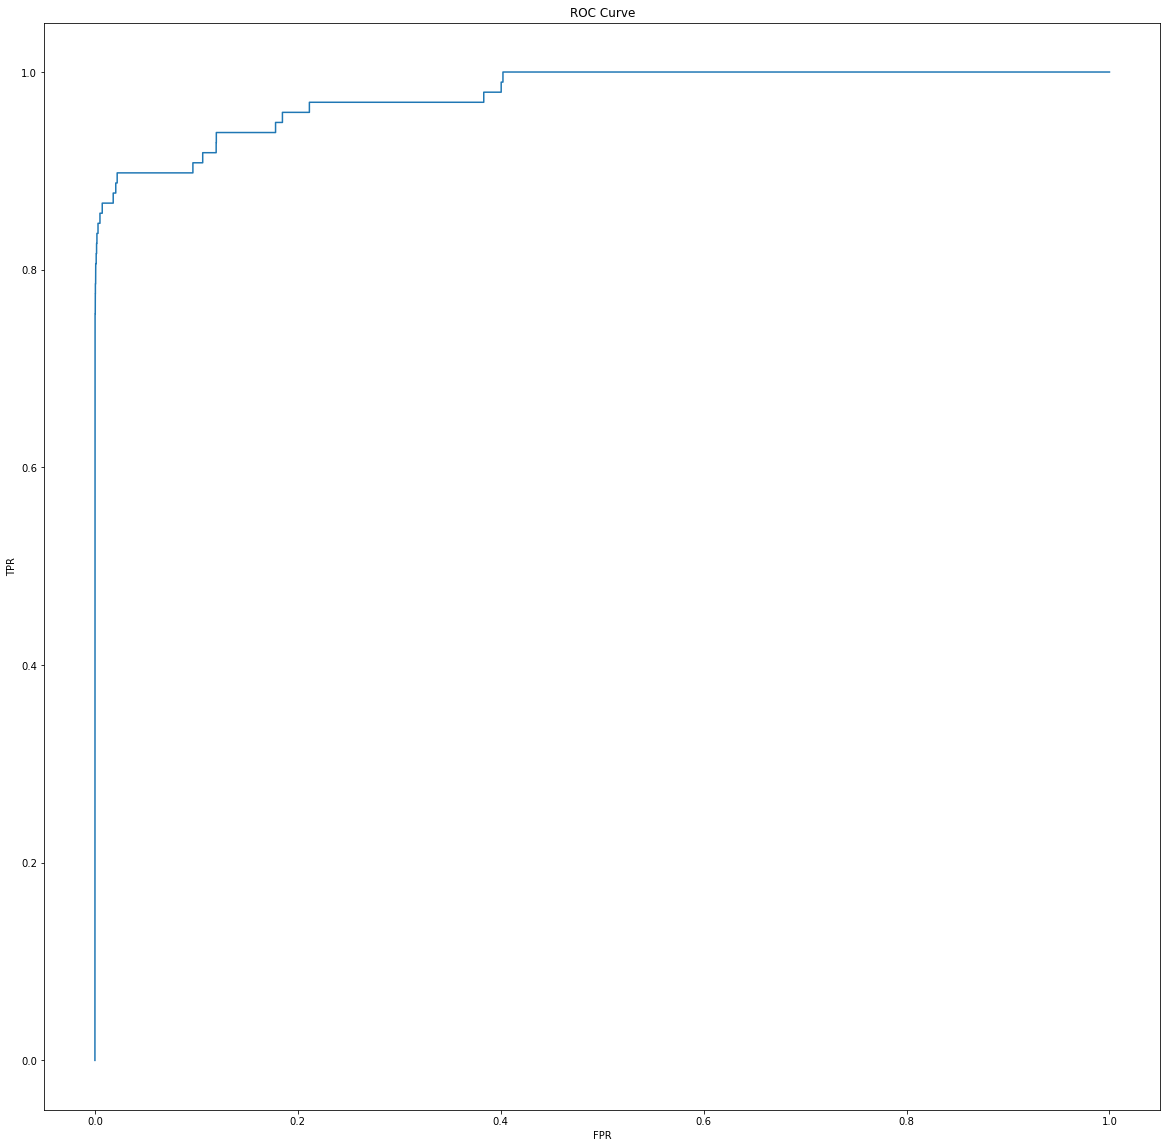

In [130]:
# Find the probability of the target to be 1
predict_proba= opti_logistic.predict_proba(X_test_cv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, predict_proba)
# Plot the ROC curve to see which value of tpr and FPR will be a good option to choose
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

In [132]:
# By setting the threshold to be 0.999 the classes of the target will be
# Prediction for train data
y_train_pred=opti_logistic.predict_proba(X_train_smote)[:,1]>0.999
# Prediction for test data
y_pred=predict_proba>0.999

In [136]:
print('Train auc =', metrics.roc_auc_score(y_test_cv, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.8926197301283033
1


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [93]:
#KNN
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm

#perform hyperparameter tuning

knn = KNeighborsClassifier()
distributions = dict(n_neighbors=[1,2,3,4,5])
clf = RandomizedSearchCV(knn, distributions)
search = clf.fit(X_train_smote, y_train_smote)
search.best_params_


{'n_neighbors': 2}

In [94]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9988678926918688
Optimal Parameters {'n_neighbors': 2}


In [95]:
#KNN with optimal hyperparameters
opti_knn = KNeighborsClassifier(n_neighbors=2)

opti_knn.fit(X_train_smote, y_train_smote)
opti__knn_ypred = opti_knn.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.998419971559488
F1 Score  0.5982142857142857
Precision Score  0.5317460317460317
Recall Score  0.6836734693877551
AUC Score   0.8413179439160431


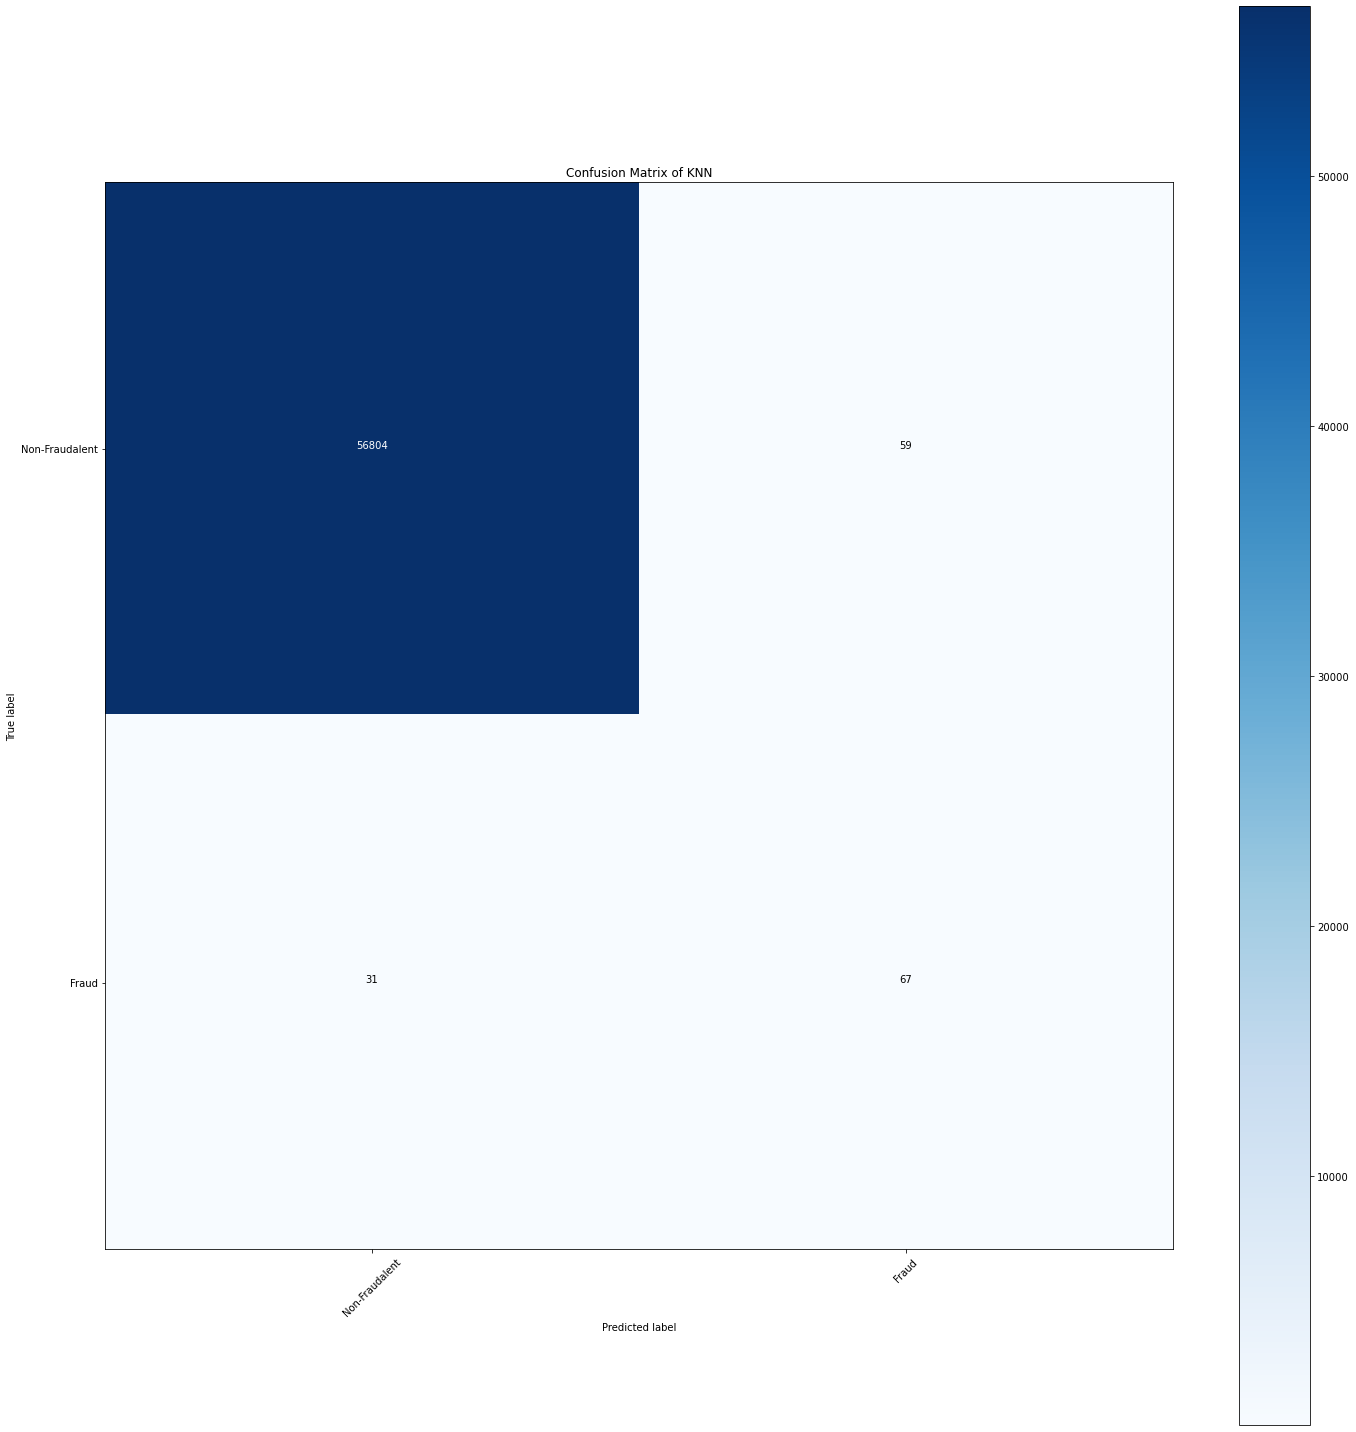

In [96]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__knn_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__knn_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__knn_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__knn_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__knn_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of KNN'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__knn_ypred, labels = [0, 1]) # Logistic Regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [97]:
#SVM
from sklearn.svm import SVC # SVM algorithm

#perform hyperparameter tuning

svm = SVC()
distributions = dict(C=[1,2], gamma=['scale', 'auto'] )
clf = RandomizedSearchCV(estimator=svm, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_smote, y_train_smote)
search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 111.0min remaining: 55.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 184.8min finished


{'gamma': 'auto', 'C': 2}

In [98]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9999151908621019
Optimal Parameters {'gamma': 'auto', 'C': 2}


In [100]:
#SVM with optimal hyperparameters
opti_svm = SVC(C=2,gamma='auto')

opti_svm.fit(X_train_smote, y_train_smote)
opti__svm_ypred = opti_svm.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9984375274310493
F1 Score  0.4258064516129032
Precision Score  0.5789473684210527
Recall Score  0.336734693877551
AUC Score   0.6681563134020293


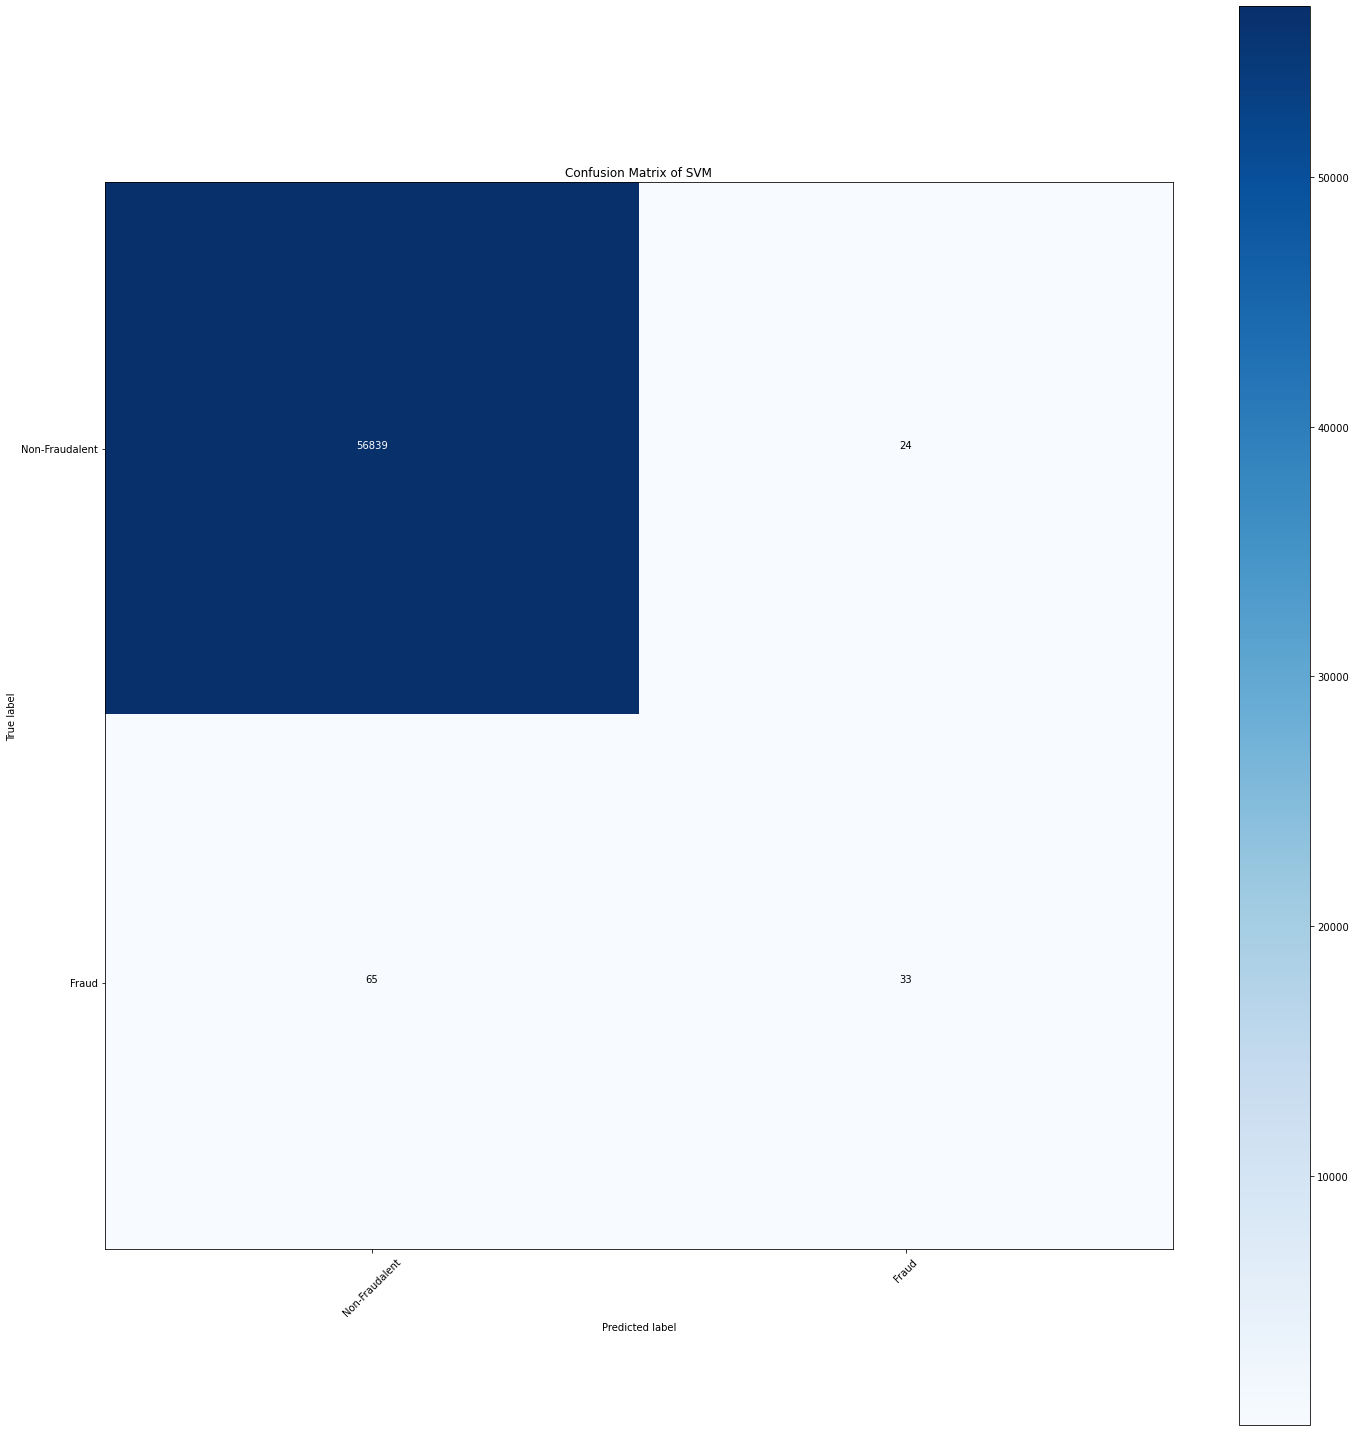

In [101]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__svm_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__svm_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__svm_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__svm_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__svm_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of SVM'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__svm_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [102]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
distributions = dict(max_depth=range(1,10), criterion=['entropy', 'gini'] )
clf = RandomizedSearchCV(estimator=dt, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_smote, y_train_smote)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


{'max_depth': 9, 'criterion': 'entropy'}

In [103]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9978496185100673
Optimal Parameters {'max_depth': 9, 'criterion': 'entropy'}


In [104]:
#Decision Tree with optimal hyperparameters
opti_dt = DecisionTreeClassifier(max_depth=9, criterion='entropy')

opti_dt.fit(X_train_smote, y_train_smote)
opti__dt_ypred = opti_dt.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9754217798142589
F1 Score  0.0979381443298969
Precision Score  0.052269601100412656
Recall Score  0.7755102040816326
AUC Score   0.8756382598059712


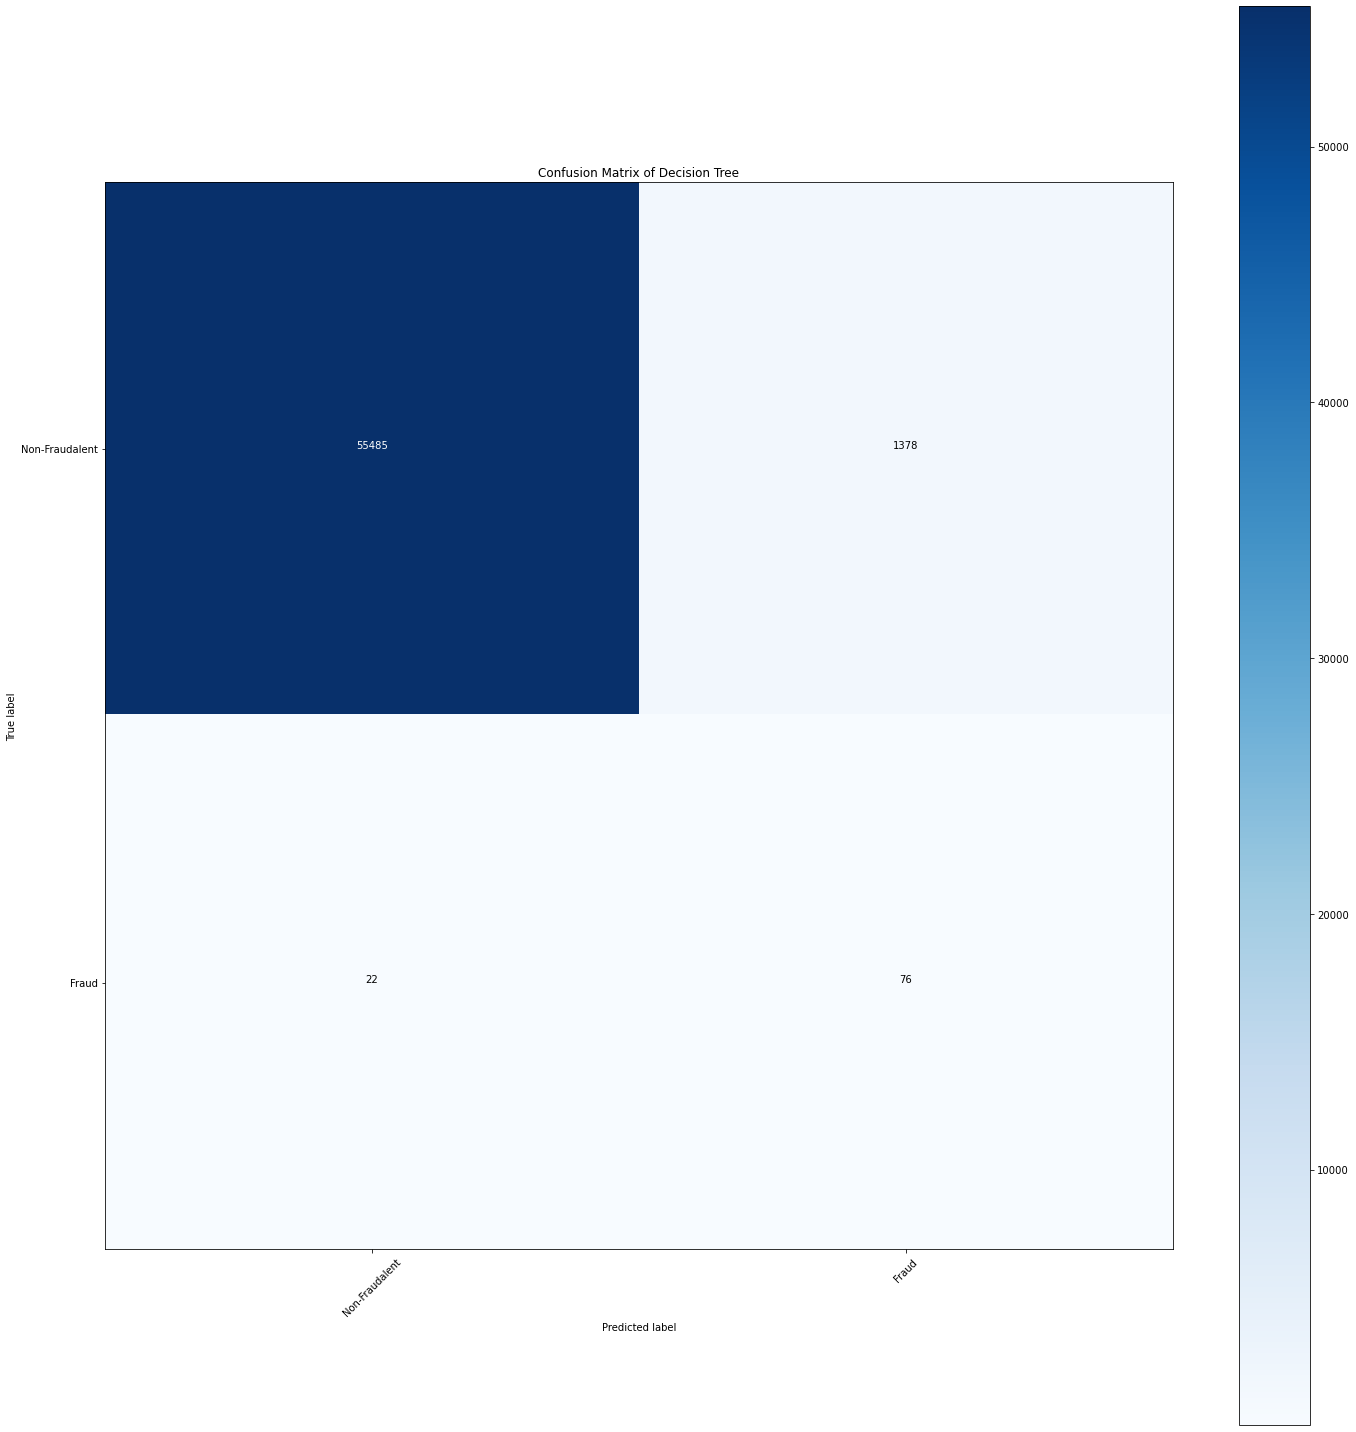

In [105]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__dt_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__dt_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__dt_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__dt_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__dt_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Decision Tree'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__dt_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [106]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
distributions = dict(n_estimators=range(1,100,10), max_depth=range(1,10), criterion=['entropy', 'gini'] )
clf = RandomizedSearchCV(estimator=rf, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_smote, y_train_smote)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.8min finished


{'n_estimators': 51, 'max_depth': 8, 'criterion': 'gini'}

In [107]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.9984837869413195
Optimal Parameters {'n_estimators': 51, 'max_depth': 8, 'criterion': 'gini'}


In [108]:
#Random Forest with optimal hyperparameters
opti_rf = RandomForestClassifier(n_estimators=51,max_depth=8, criterion='gini')

opti_rf.fit(X_train_smote, y_train_smote)
opti__rf_ypred = opti_rf.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9981741893576307
F1 Score  0.6060606060606061
Precision Score  0.4819277108433735
Recall Score  0.8163265306122449
AUC Score   0.9074070617994485


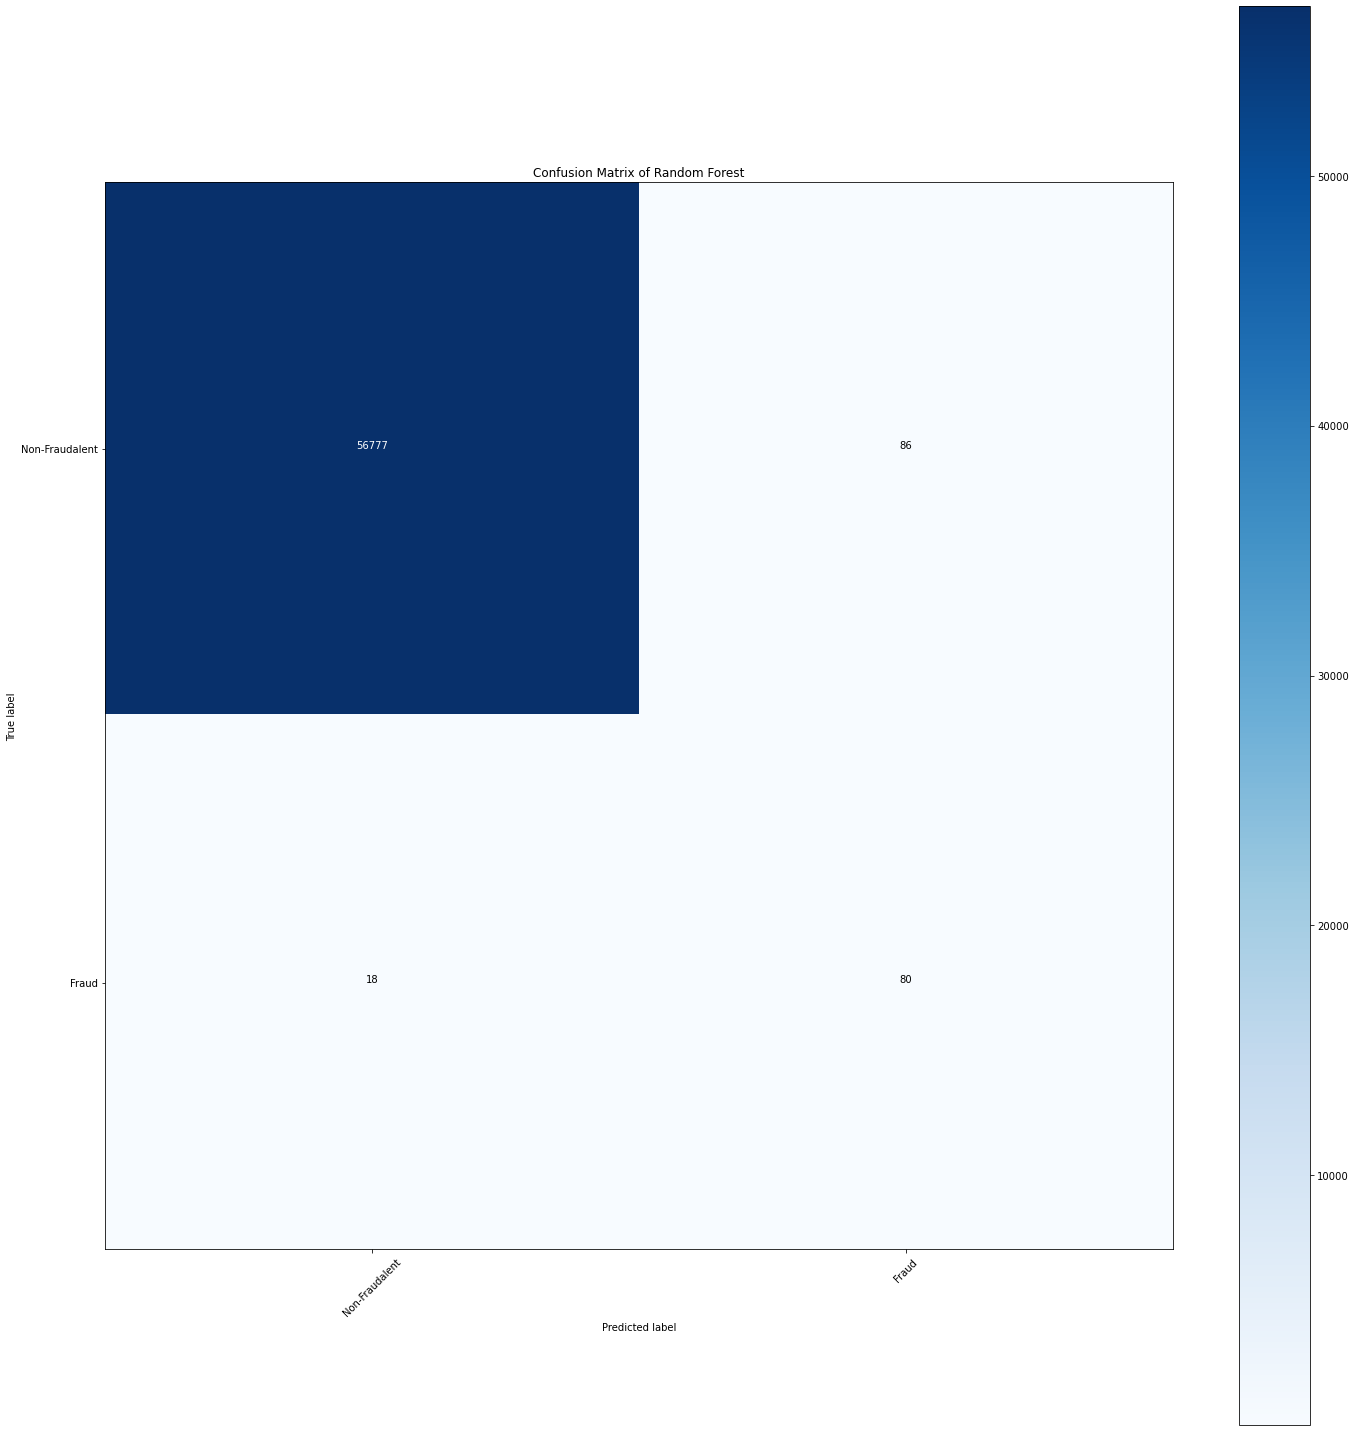

In [109]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__rf_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__rf_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__rf_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__rf_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__rf_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of Random Forest'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__rf_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [110]:
#XGBoost
from xgboost import XGBClassifier

xgbc = XGBClassifier()
distributions = dict(n_estimators=range(1,100,10), max_depth=range(1,10))
clf = RandomizedSearchCV(estimator=xgbc, param_distributions = distributions, cv=3,scoring='roc_auc', verbose=5, n_jobs=-1,random_state=20)

search = clf.fit(X_train_smote, y_train_smote)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.7min finished


[01:16:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 71, 'max_depth': 9}

In [111]:
#print the optimal value of hyperparameters
print("Accuracy",clf.best_score_)
print("Optimal Parameters",clf.best_params_)

Accuracy 0.999902597751396
Optimal Parameters {'n_estimators': 71, 'max_depth': 9}


In [112]:
#XGBoost with optimal hyperparameters
opti_xgb = RandomForestClassifier(n_estimators=71,max_depth=9)

opti_xgb.fit(X_train_smote, y_train_smote)
opti__xgb_ypred = opti_xgb.predict(X_test_cv)

Evaluation Metrics
Accuracy  0.9988939800916417
F1 Score  0.7096774193548386
Precision Score  0.6470588235294118
Recall Score  0.7857142857142857
AUC Score   0.892487834167837


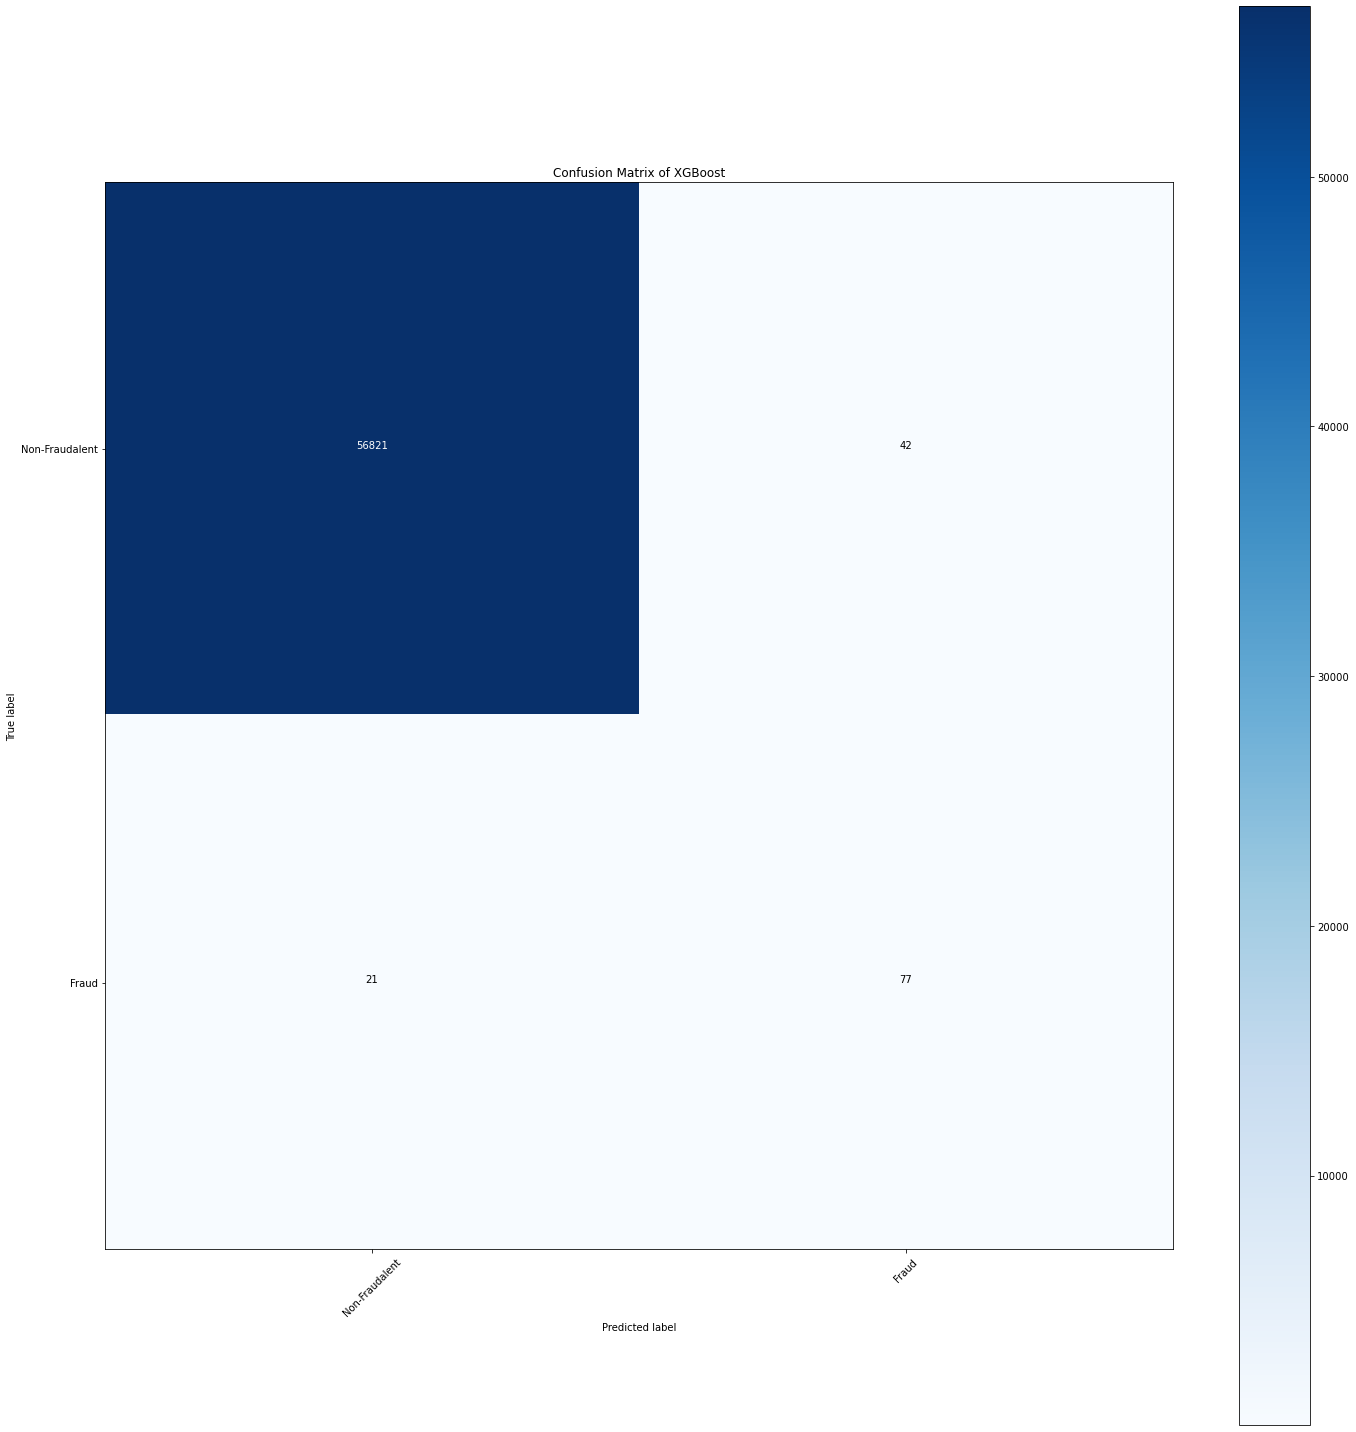

In [113]:
#print the evaluation result by choosing a evaluation metric
print("Evaluation Metrics")
print("Accuracy ", (accuracy_score(y_test_cv, opti__xgb_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__xgb_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__xgb_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__xgb_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__xgb_ypred)))

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of XGBoost'
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr_matrix = confusion_matrix(y_test_cv, opti__xgb_ypred, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraudalent','Fraud'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [114]:
#Summary of metrics
print("Summary of metrics of all models after solving imbalance with SMOTE")
print("\nLogistic Regression-------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti_ypred)))
print("AUC Score - Chosen metric ", (roc_auc_score(y_test_cv, opti_ypred)))
print("\nKNN                -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__knn_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__knn_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__knn_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__knn_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__knn_ypred)))
print("\nSVM                -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__svm_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__svm_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__svm_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__svm_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__svm_ypred)))
print("\nDecision Tree      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__dt_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__dt_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__dt_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__dt_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__dt_ypred)))
print("\nRandom Forest      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__rf_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__rf_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__rf_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__rf_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__rf_ypred)))
print("\nXGBoost      -------------")
print("Accuracy ", (accuracy_score(y_test_cv, opti__xgb_ypred)))
print("F1 Score ", (f1_score(y_test_cv, opti__xgb_ypred)))
print("Precision Score ", (precision_score(y_test_cv, opti__xgb_ypred)))
print("Recall Score ", (recall_score(y_test_cv, opti__xgb_ypred)))
print("AUC Score  ", (roc_auc_score(y_test_cv, opti__xgb_ypred)))

Summary of metrics of all models after solving imbalance with SMOTE

Logistic Regression-------------
Accuracy  0.9824616843103176
F1 Score  0.1454234388366125
Precision Score  0.07936507936507936
Recall Score  0.8673469387755102
AUC Score - Chosen metric  0.9250035082530982

KNN                -------------
Accuracy  0.998419971559488
F1 Score  0.5982142857142857
Precision Score  0.5317460317460317
Recall Score  0.6836734693877551
AUC Score   0.8413179439160431

SVM                -------------
Accuracy  0.9984375274310493
F1 Score  0.4258064516129032
Precision Score  0.5789473684210527
Recall Score  0.336734693877551
AUC Score   0.6681563134020293

Decision Tree      -------------
Accuracy  0.9754217798142589
F1 Score  0.0979381443298969
Precision Score  0.052269601100412656
Recall Score  0.7755102040816326
AUC Score   0.8756382598059712

Random Forest      -------------
Accuracy  0.9981741893576307
F1 Score  0.6060606060606061
Precision Score  0.4819277108433735
Recall Score  0.8163

### Logistic Regression model seems to be the best at catching fraud with the highest correct fraud calls with highest ROC_AUC Score with SMOTE 

### Class Imbalance has been handled by Random Oversampler and SMOTE (any 2 techniques as mentioned in the evaluation rubric)

### Print the class distribution after applying ADASYN

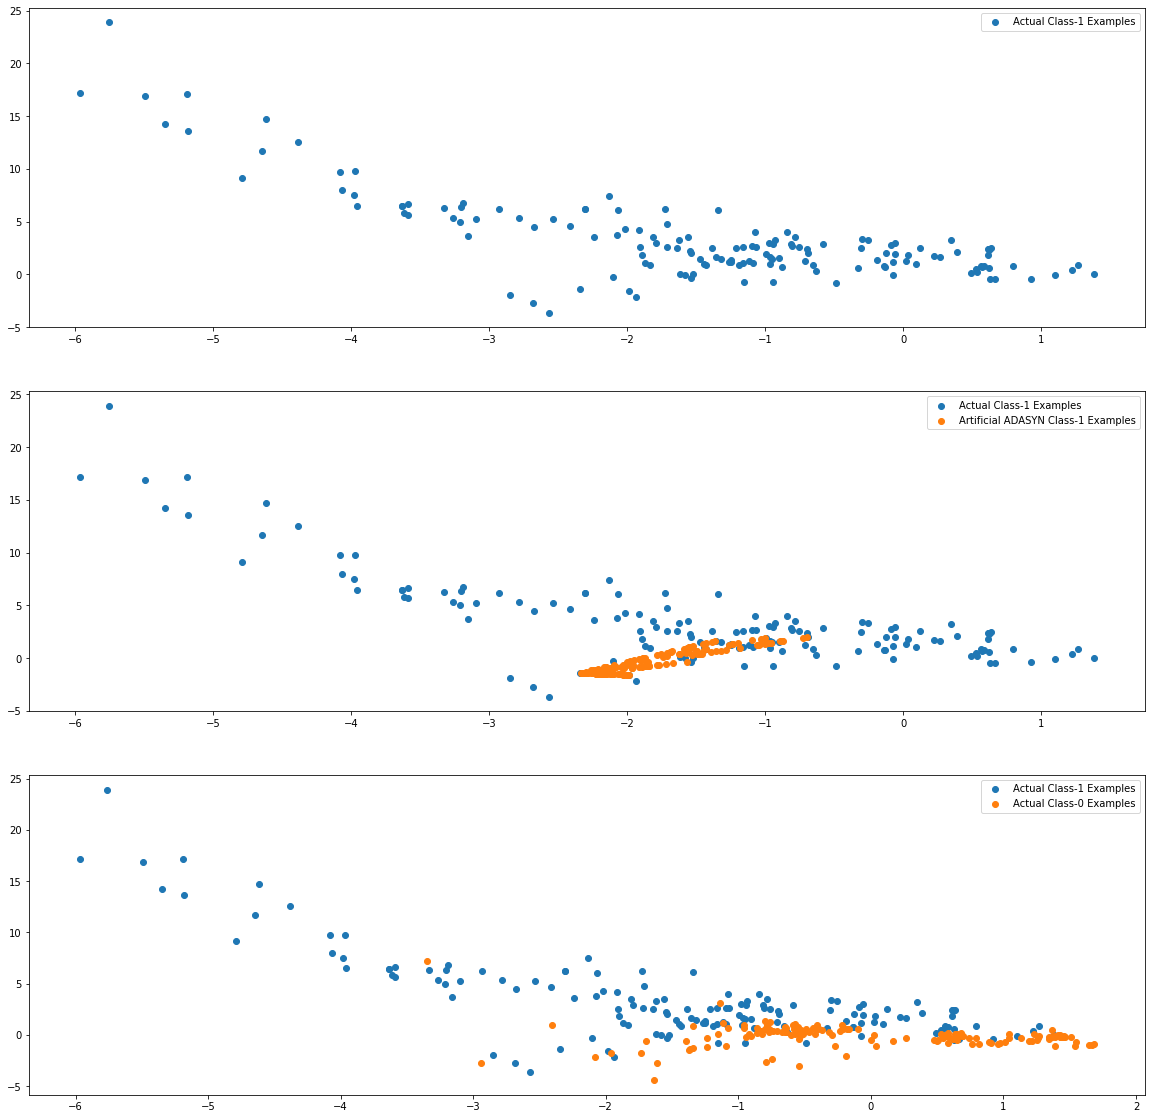

In [120]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 12


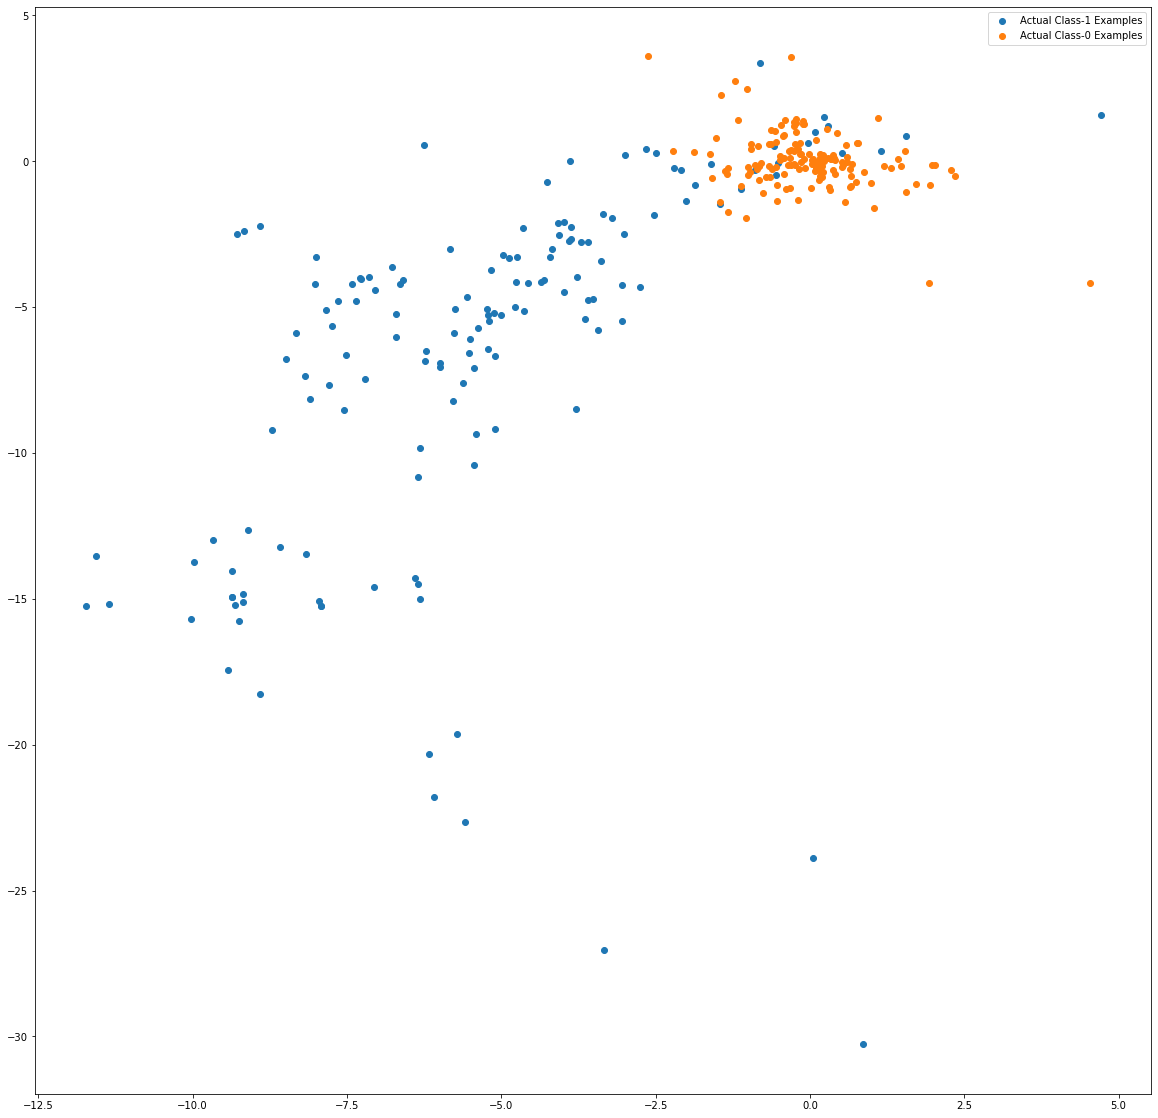

In [123]:
var_imp = []
for i in opti_rf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(opti_rf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(opti_rf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(opti_rf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(opti_rf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(opti_rf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()